### Import Libraries

In [3]:
#Importing necessary libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from apyori import apriori
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder


### Load Data

In [4]:
#Reading Groceries dataset

data = pd.read_csv('D:/MS/Michigan/MSU/Fall 2023/Data Mining/Project/groceries - groceries.csv')
print(f'Shape of data: {data.shape[0]} rows and {data.shape[1]} columns')

Shape of data: 9835 rows and 33 columns


In [5]:
#Quick look at the dataset

data.head()

Item(s)            Item 1               Item 2          Item 3  \
0        4      citrus fruit  semi-finished bread       margarine   
1        3    tropical fruit               yogurt          coffee   
2        1        whole milk                  NaN             NaN   
3        4         pip fruit               yogurt    cream cheese   
4        4  other vegetables           whole milk  condensed milk   

                     Item 4 Item 5 Item 6 Item 7 Item 8 Item 9  ... Item 23  \
0               ready soups    NaN    NaN    NaN    NaN    NaN  ...     NaN   
1                       NaN    NaN    NaN    NaN    NaN    NaN  ...     NaN   
2                       NaN    NaN    NaN    NaN    NaN    NaN  ...     NaN   
3              meat spreads    NaN    NaN    NaN    NaN    NaN  ...     NaN   
4  long life bakery product    NaN    NaN    NaN    NaN    NaN  ...     NaN   

  Item 24 Item 25 Item 26 Item 27 Item 28 Item 29 Item 30 Item 31 Item 32  
0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
1     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
2     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
3     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
4     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[5 rows x 33 columns]

### Data Pre-processing

In [6]:
# Checking missing values if any in the dataset

non_missing_per_transaction = data.iloc[:, 1:33].count(axis=1)
#print(non_missing_per_transaction)

items_per_transaction = data["Item(s)"]
#print(items_per_transaction)

indiv_transactions = (non_missing_per_transaction == items_per_transaction)
#print(indiv_transactions)

num_rows_with_missing_values = (~indiv_transactions).sum()
#print(num_rows_with_missing_values)

print("Number of transactions with Missing Values (Mismatch in Number of Items):", num_rows_with_missing_values)

Number of transactions with Missing Values (Mismatch in Number of Items): 0


In [7]:
#Dropping unnecessary columns

grocery_df = data.drop("Item(s)", axis=1)
grocery_df.head()

Item 1               Item 2          Item 3  \
0      citrus fruit  semi-finished bread       margarine   
1    tropical fruit               yogurt          coffee   
2        whole milk                  NaN             NaN   
3         pip fruit               yogurt    cream cheese   
4  other vegetables           whole milk  condensed milk   

                     Item 4 Item 5 Item 6 Item 7 Item 8 Item 9 Item 10  ...  \
0               ready soups    NaN    NaN    NaN    NaN    NaN     NaN  ...   
1                       NaN    NaN    NaN    NaN    NaN    NaN     NaN  ...   
2                       NaN    NaN    NaN    NaN    NaN    NaN     NaN  ...   
3              meat spreads    NaN    NaN    NaN    NaN    NaN     NaN  ...   
4  long life bakery product    NaN    NaN    NaN    NaN    NaN     NaN  ...   

  Item 23 Item 24 Item 25 Item 26 Item 27 Item 28 Item 29 Item 30 Item 31  \
0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

  Item 32  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  

[5 rows x 32 columns]

In [8]:
grocery_df.shape

(9835, 32)

In [9]:
grocery_df.dtypes

Item 1     object
Item 2     object
Item 3     object
Item 4     object
Item 5     object
Item 6     object
Item 7     object
Item 8     object
Item 9     object
Item 10    object
Item 11    object
Item 12    object
Item 13    object
Item 14    object
Item 15    object
Item 16    object
Item 17    object
Item 18    object
Item 19    object
Item 20    object
Item 21    object
Item 22    object
Item 23    object
Item 24    object
Item 25    object
Item 26    object
Item 27    object
Item 28    object
Item 29    object
Item 30    object
Item 31    object
Item 32    object
dtype: object

### Exploratory Data Analysis

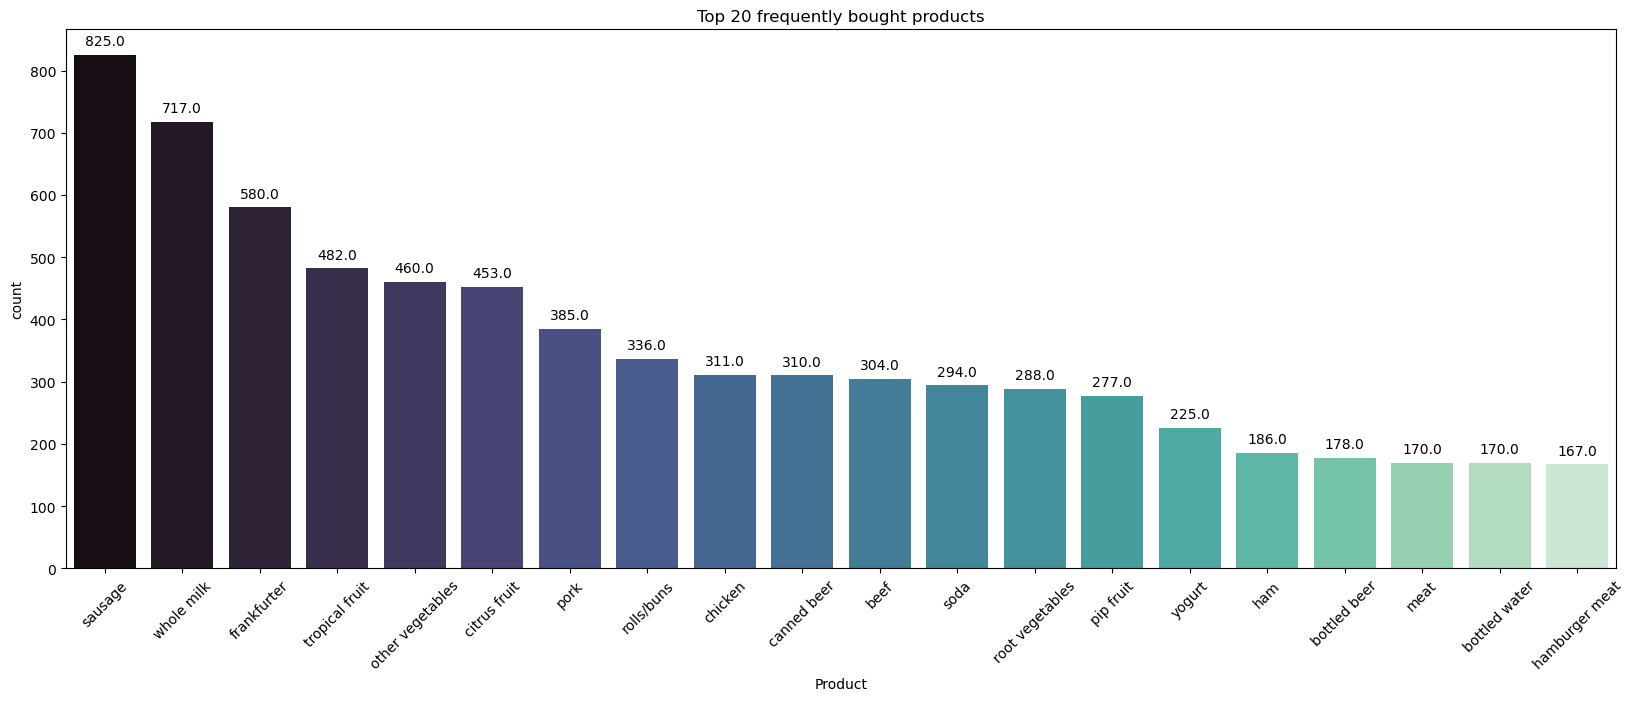

In [10]:
#Top 20 frequently buying items by customer

plt.rcParams['figure.figsize']=20,7
ax = sns.countplot(data=data, x=data['Item 1'],
             order = data['Item 1'].value_counts().head(20).index,
             palette='mako')
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.title('Top 20 frequently bought products')
plt.xticks(rotation=45)

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)
    
plt.show()

C:\Users\mounika\anaconda3\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


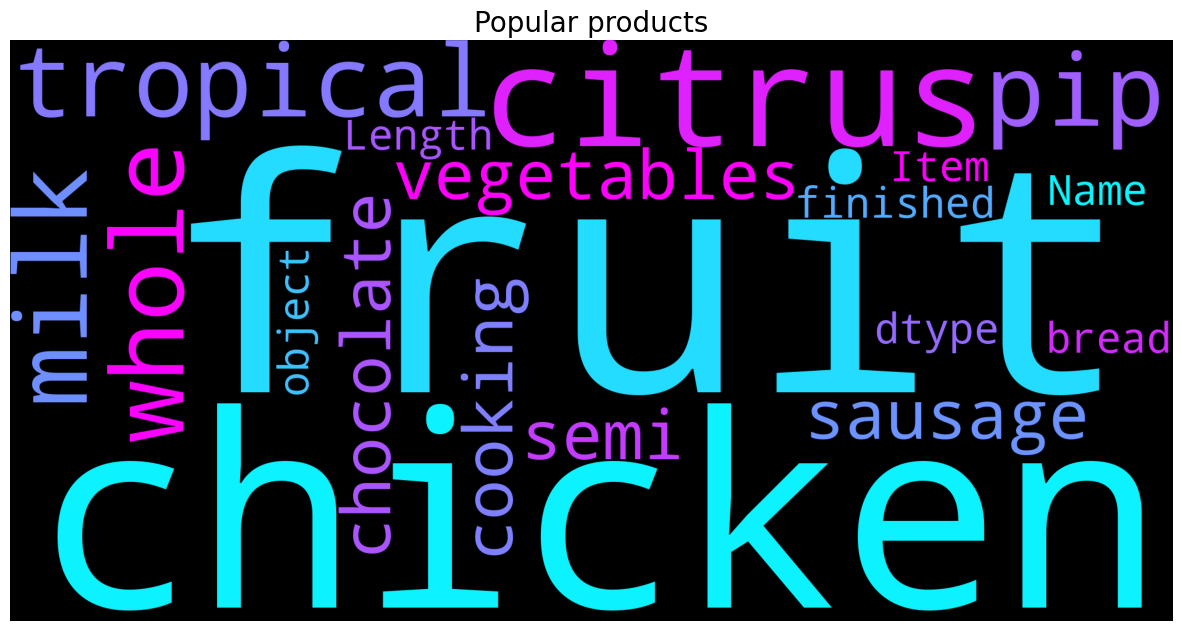

In [11]:
#let's check popular products

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(width = 2000,  height = 1000, max_words = 20, colormap='cool').generate(str(data['Item 1']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Popular products',fontsize = 20)
plt.show()

Text(0.5, 1.0, 'Top 5 Standalone Purchase Items')

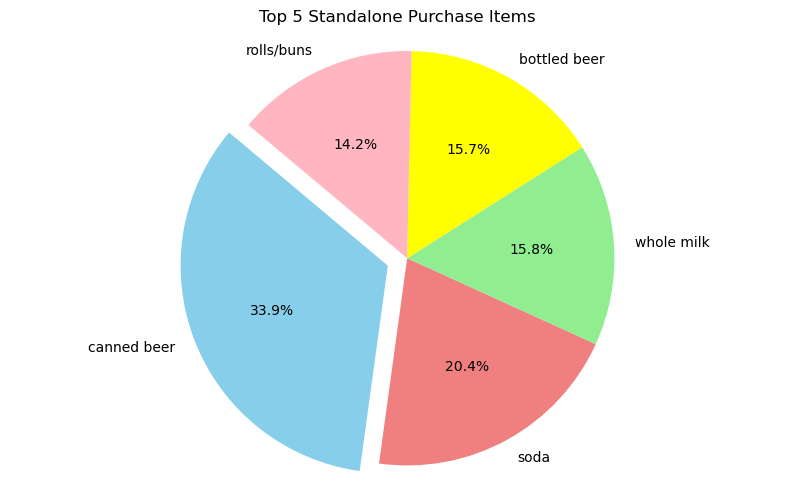

In [12]:
#Let's check for Standalone Purchases

transaction_items = data.columns[1:33]

standalone_purchases = data[data["Item(s)"] == 1][transaction_items]

# Item Frequency Analysis for Standalone Purchases
standalone_items = standalone_purchases.stack().value_counts()
top_standalone_items = standalone_items.head(5)

# Create a pie chart
plt.figure(figsize=(10, 6))
explode = (0.1, 0, 0, 0, 0)  

plt.pie(top_standalone_items.values, labels=top_standalone_items.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral', 'lightgreen', 'yellow', 'lightpink'], explode=explode)

plt.axis('equal')  
plt.title('Top 5 Standalone Purchase Items')

In [13]:
#let's create a list of list of transaction

text = grocery_df.values.astype(str).tolist()
text = [[item for item in row if (str(item) != 'nan')&(item!='')] for row in text]
records = []
for item in text:
    item.sort()
    records.append(item)
    
records[:6]

[['citrus fruit', 'margarine', 'ready soups', 'semi-finished bread'],
 ['coffee', 'tropical fruit', 'yogurt'],
 ['whole milk'],
 ['cream cheese', 'meat spreads', 'pip fruit', 'yogurt'],
 ['condensed milk',
  'long life bakery product',
  'other vegetables',
  'whole milk'],
 ['abrasive cleaner', 'butter', 'rice', 'whole milk', 'yogurt']]

In [14]:
#Let's check transactions with multiple items at a time

text_sorted_filter_length = []

for item in records:
    if len(item) > 2:
        text_sorted_filter_length.append(item)

text_sorted_filter_length.sort(key=len)
text_sorted_filter_length[:6]

[['coffee', 'tropical fruit', 'yogurt'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['beef', 'detergent', 'grapes'],
 ['citrus fruit', 'newspapers', 'zwieback'],
 ['brown bread', 'canned beer', 'packaged fruit/vegetables'],
 ['pastry', 'rolls/buns', 'sugar']]

In [15]:
len(text_sorted_filter_length)

6033

We observe that there are more than 6000 transactions where 3 or more items are purchased.

In [16]:
#Let's analyze the no. of items wrt each transaction

counts = [len(record) for record in records]
print(f'50 percent of the transactions are having items below or equal to {np.quantile(counts, .5)} only')
print(f'Particular transaction having a maximum of {np.quantile(counts, 1)} items in it')

50 percent of the transactions are having items below or equal to 3.0 only
Particular transaction having a maximum of 32 items in it


In [17]:
df_plot = pd.DataFrame(pd.Series(text_sorted_filter_length).value_counts()).reset_index()
df_plot

index   0
0                           [rolls/buns, sausage, soda]  10
1                [bottled beer, liquor, red/blush wine]   5
2                     [rolls/buns, sausage, whole milk]   4
3          [bottled beer, liquor, red/blush wine, soda]   4
4                            [pastry, rolls/buns, soda]   4
...                                                 ...  ..
5916  [margarine, other vegetables, photo/film, pip ...   1
5917       [berries, sugar, whipped/sour cream, yogurt]   1
5918            [beef, butter milk, citrus fruit, curd]   1
5919  [frozen meals, pip fruit, softener, tropical f...   1
5920  [beef, beverages, butter, candles, chicken, ci...   1

[5921 rows x 2 columns]

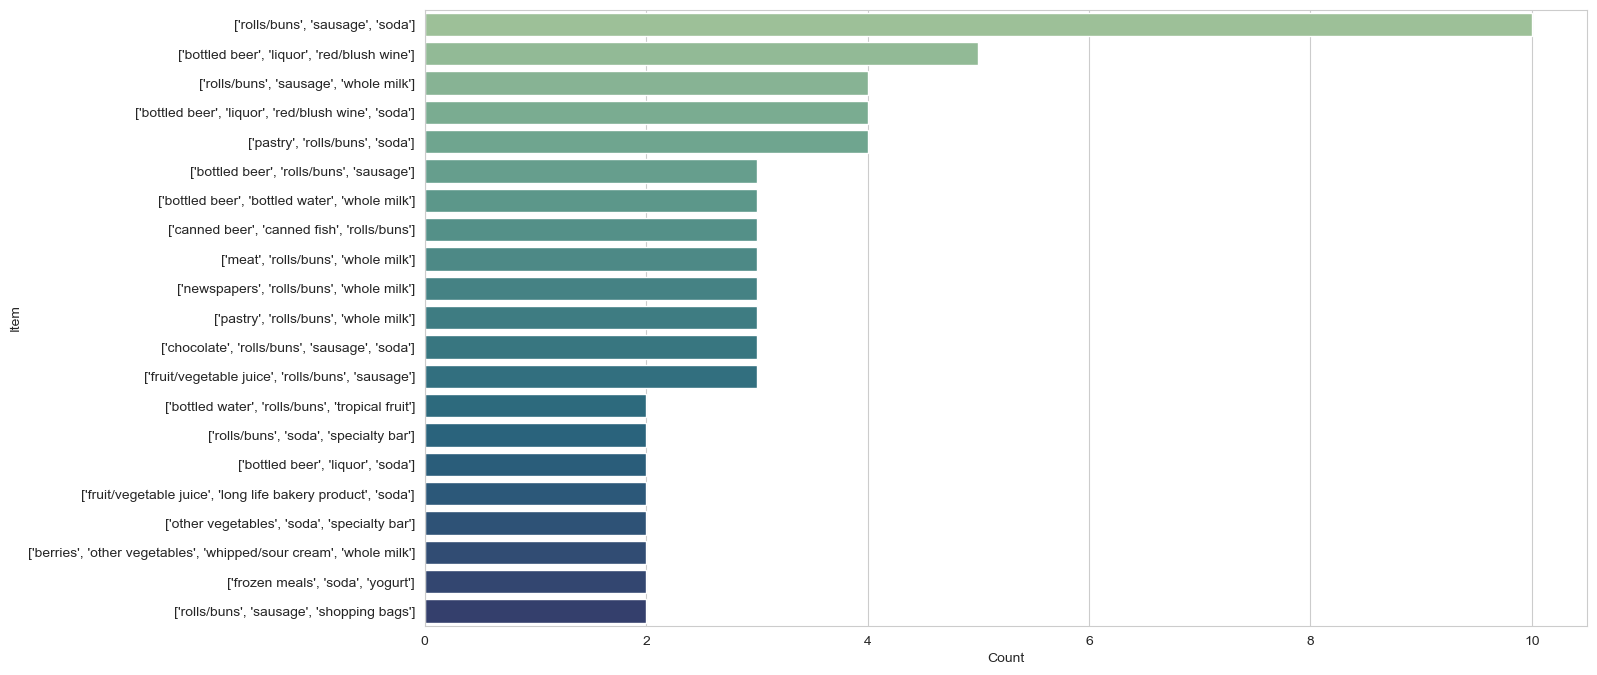

In [18]:
#Let's check for duplicated transaction combinations

df_plot.columns = ['Item','Count']
df_plot['Item'] = df_plot['Item'].astype(str)
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
sns.barplot(y='Item', x='Count', data=df_plot[:21], palette='crest');

From the above figure, we observe that not many transactions are duplicated in the dataset.

In [19]:
df_plot.astype(str).head()

Item Count
0                  ['rolls/buns', 'sausage', 'soda']    10
1       ['bottled beer', 'liquor', 'red/blush wine']     5
2            ['rolls/buns', 'sausage', 'whole milk']     4
3  ['bottled beer', 'liquor', 'red/blush wine', '...     4
4                   ['pastry', 'rolls/buns', 'soda']     4

In [20]:
text = [item for sublist in text for item in sublist]
text = [w.replace(' ', '_') for w in text]
text = [w.replace('/', '_') for w in text]
text.sort()
text[:10]

['Instant_food_products',
 'Instant_food_products',
 'Instant_food_products',
 'Instant_food_products',
 'Instant_food_products',
 'Instant_food_products',
 'Instant_food_products',
 'Instant_food_products',
 'Instant_food_products',
 'Instant_food_products']

In [21]:
pd.Series(text).value_counts()

whole_milk               2513
other_vegetables         1903
rolls_buns               1809
soda                     1715
yogurt                   1372
                         ... 
bags                        4
kitchen_utensil             4
preservation_products       2
baby_food                   1
sound_storage_medium        1
Length: 169, dtype: int64

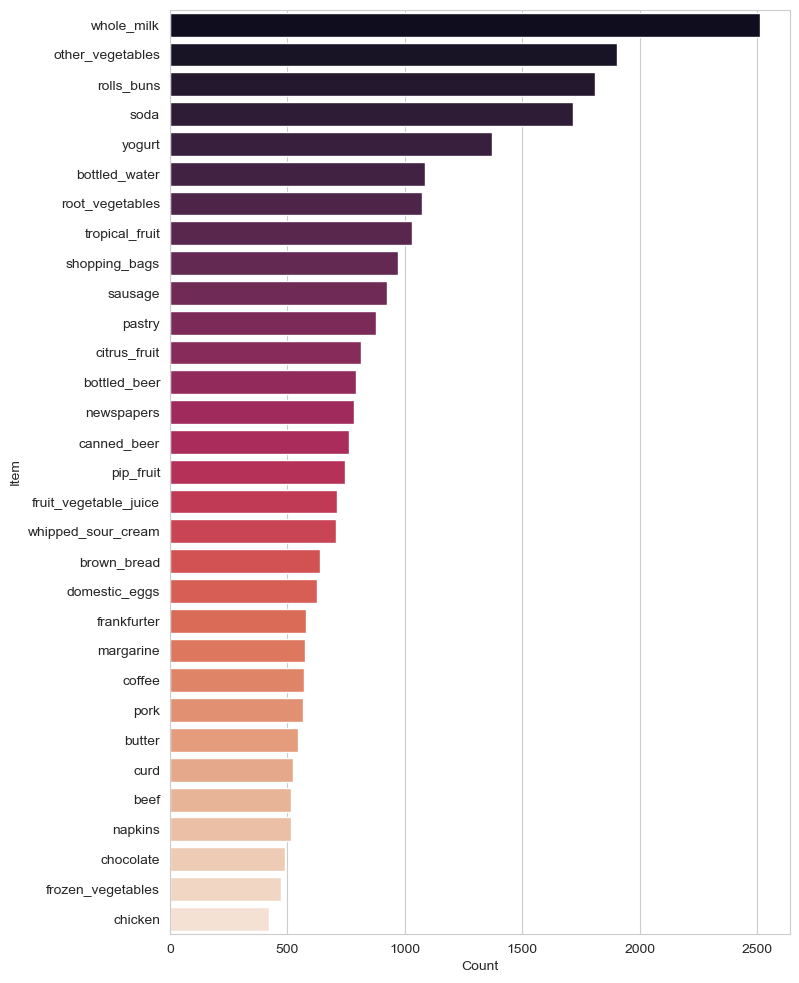

In [22]:
#Let's check for most common purchases among all transactions

df_plot = pd.DataFrame(pd.Series(text).value_counts()).reset_index()
df_plot.columns = ['Item','Count']
sns.set_style('whitegrid')
plt.figure(figsize=(8,12))
sns.barplot(y='Item', x='Count', data=df_plot[:31], palette='rocket');

From the figure above, we can see the most occuring items throughout all transactions.

There are 43,367 items


C:\Users\mounika\anaconda3\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


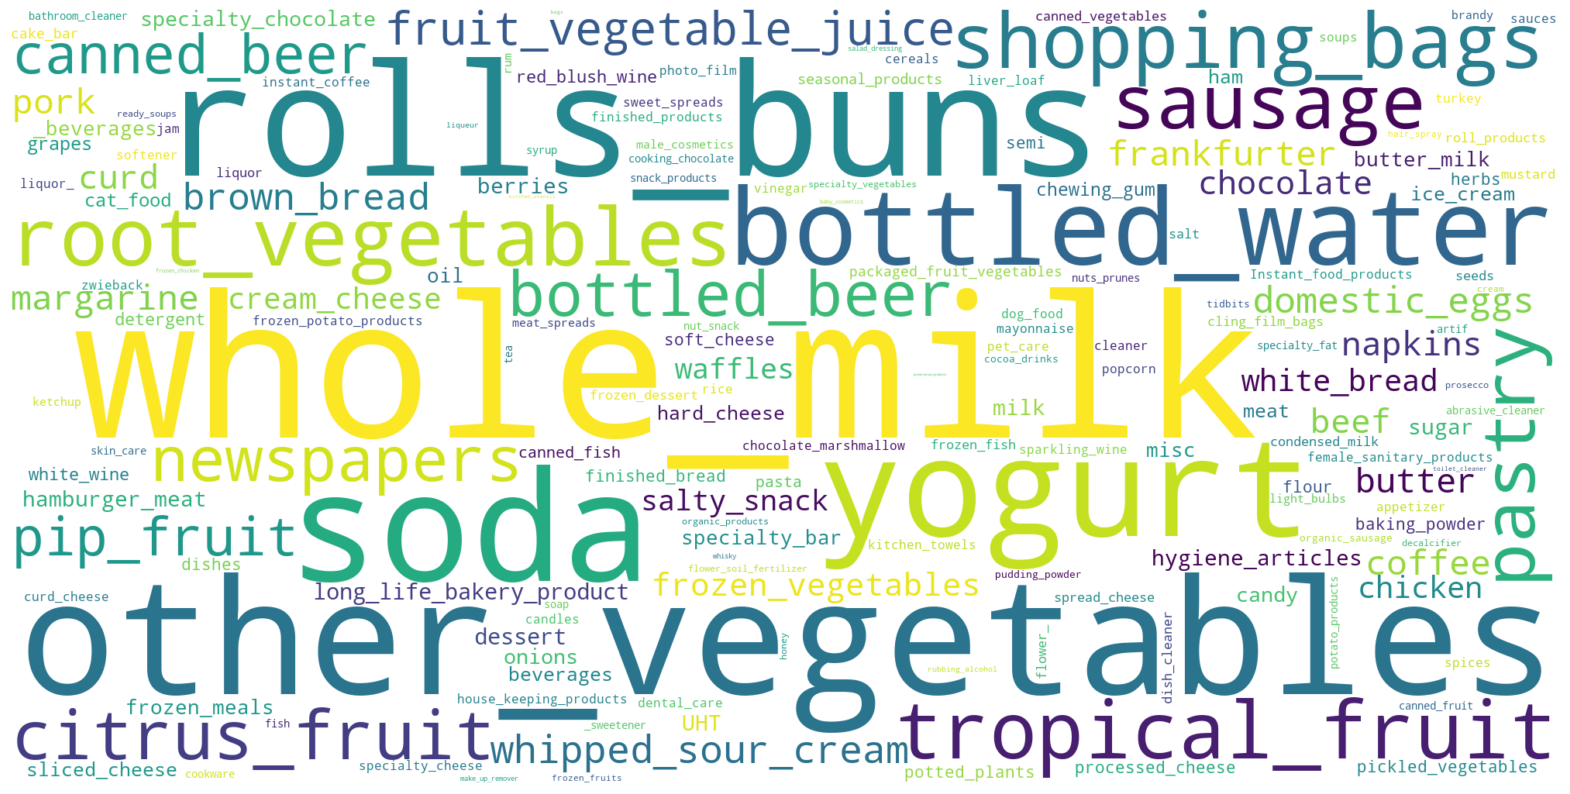

In [23]:
#Let's visualize most occuring items in a word cloud

nr_words = '{:,}'.format(len(text))
print ("There are",nr_words,"items",)

wordcloud = WordCloud( background_color="white",width=2000, height=1000,max_words=500,collocations=False).generate(" ".join(text))
plt.figure(figsize=[20,20])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [24]:
#Importing necessary libraries

from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
from adjustText import adjust_text

C:\Users\mounika\anaconda3\Lib\site-packages\botocore\utils.py:15: DeprecationWarning: 'cgi' is deprecated and slated for removal in Python 3.13
  import cgi
C:\Users\mounika\anaconda3\Lib\site-packages\botocore\httpsession.py:41: DeprecationWarning: 'urllib3.contrib.pyopenssl' module is deprecated and will be removed in a future release of urllib3 2.x. Read more in this issue: https://github.com/urllib3/urllib3/issues/2680
  from urllib3.contrib.pyopenssl import orig_util_SSLContext as SSLContext


In [25]:
sentences = []
for i, row in data.iterrows():
    vals = row.values[1:].astype(str)
    
    # Remove the nans
    vals = vals[vals != 'nan']
    
    # Order does not really matter in shopping baskets (unlike English sentences)
    # so this is a form of augmentation
    for _ in range(min(3, len(vals))):
        np.random.shuffle(vals)
        sentences.append(list(vals))
        
print('\n'.join([', '.join(x) for x in sentences[:10]]))

ready soups, margarine, citrus fruit, semi-finished bread
margarine, citrus fruit, ready soups, semi-finished bread
semi-finished bread, ready soups, citrus fruit, margarine
coffee, yogurt, tropical fruit
tropical fruit, yogurt, coffee
tropical fruit, coffee, yogurt
whole milk
yogurt, pip fruit, meat spreads, cream cheese
meat spreads, yogurt, pip fruit, cream cheese
yogurt, cream cheese, pip fruit, meat spreads


In [26]:
print('Embedding {} sentences...'.format(len(sentences)))
    
model = Word2Vec(
    sentences,
    # size=10,
    window=3,
    workers=1,
    sg=0,
    # iter=25,
    negative=25,
    min_count=1,
    seed=42,
    compute_loss=True
)

print(model.get_latest_training_loss())

Embedding 23544 sentences...
1531397.875


C:\Users\mounika\AppData\Local\Temp\ipykernel_22584\1711731017.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


169 (169, 100)


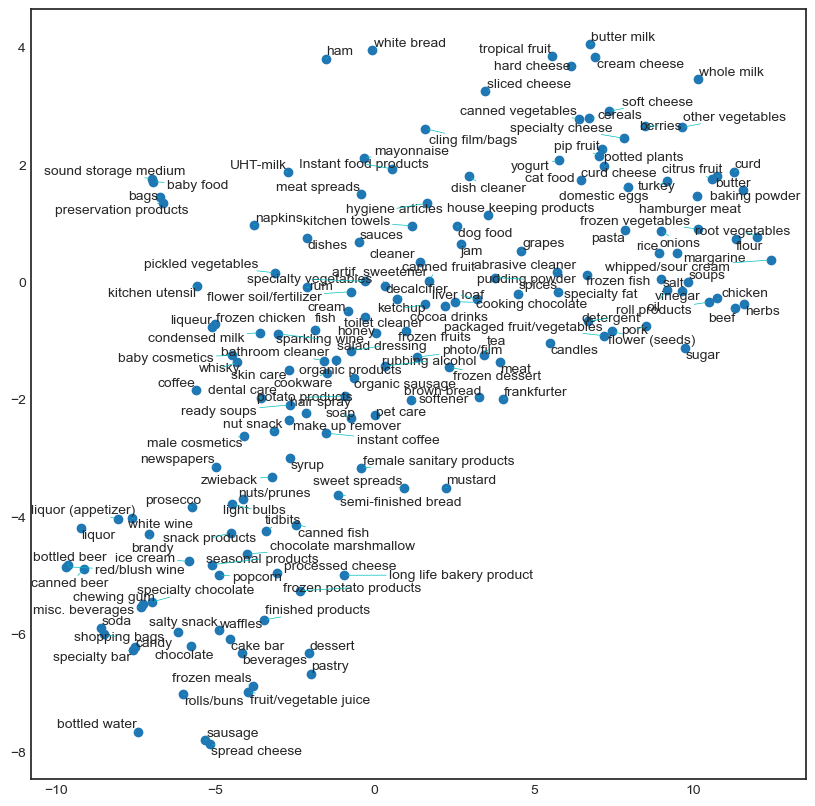

In [27]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=8,8 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 10
plt.rcParams['lines.linewidth'] = 3


products = list(model.wv.index_to_key)
embeddings = []
for product in products:
    embeddings.append(model.wv[product])
embeddings = np.array(embeddings)
print(len(products), embeddings.shape)

tsne = TSNE(random_state=42)
X_tsne = tsne.fit_transform(embeddings)

plt.figure(figsize=(10, 10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])

texts = []
for x, y, lab in zip(X_tsne[:, 0], X_tsne[:, 1], products):
    text = plt.text(x, y, lab)
    texts.append(text)
    
adjust_text(texts, lim=5, arrowprops=dict(arrowstyle="-", color='c', lw=0.5))
plt.show()

The figure shown above is randomly generated, making any discussion about specific locations on the chart is nonsensical. Generally, items that are frequently bought together are visually grouped. For instance, there is an observable pattern of association between dairy products and vegetables/fruits, reflecting their frequent simultaneous purchase. Likewise, the presence of soda, beer, wine, beverages, and liquor in close proximity suggests a recurring trend of customers purchasing these items together.

### Transformation

In [28]:
oht = pd.get_dummies(data[transaction_items])

# Generate frequent itemsets using Apriori
frequent_itemsets = apriori(oht, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Print frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Print association rules
print("\nAssociation Rules:")
print(rules)

C:\Users\mounika\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Itemsets:
     support                                           itemsets
0   0.030910                                      (Item 1_beef)
1   0.012303                                   (Item 1_berries)
2   0.018099                              (Item 1_bottled beer)
3   0.017285                             (Item 1_bottled water)
4   0.031520                               (Item 1_canned beer)
..       ...                                                ...
81  0.014032       (Item 1_other vegetables, Item 2_whole milk)
82  0.018302       (Item 2_other vegetables, Item 3_whole milk)
83  0.012506  (Item 2_root vegetables, Item 3_other vegetables)
84  0.017285       (Item 4_whole milk, Item 3_other vegetables)
85  0.010574       (Item 4_other vegetables, Item 5_whole milk)

[86 rows x 2 columns]

Association Rules:
                  antecedents                consequents  antecedent support  \
0       (Item 1_citrus fruit)    (Item 2_tropical fruit)            0.046060   
1     (Ite

In [29]:
# Analyzing the association rules

# Sorting the rules by metrics confidence, lift
sorted_rules = rules.sort_values(by=['confidence', 'lift'], ascending=[False, False])

# Printing the top 10 rules
top_N = 10
print("Top {} Association Rules:".format(top_N))
print(sorted_rules.head(top_N))

# Filtering rules based on confidence and lift
filtered_rules = sorted_rules[(sorted_rules['confidence'] >= 0.5) & (sorted_rules['lift'] >= 1.5)]
print("\nFiltered Association Rules:")
print(filtered_rules)

Top 10 Association Rules:
                  antecedents                consequents  antecedent support  \
3            (Item 2_sausage)       (Item 1_frankfurter)            0.010066   
13        (Item 5_whole milk)  (Item 4_other vegetables)            0.015150   
10        (Item 4_whole milk)  (Item 3_other vegetables)            0.032028   
11  (Item 3_other vegetables)        (Item 4_whole milk)            0.042196   
12  (Item 4_other vegetables)        (Item 5_whole milk)            0.025826   
7         (Item 3_whole milk)  (Item 2_other vegetables)            0.051449   
6   (Item 2_other vegetables)        (Item 3_whole milk)            0.055923   
8    (Item 2_root vegetables)  (Item 3_other vegetables)            0.038943   
1     (Item 2_tropical fruit)      (Item 1_citrus fruit)            0.036096   
4   (Item 1_other vegetables)        (Item 2_whole milk)            0.046772   

    consequent support   support  confidence       lift  leverage  conviction  \
3           

In [30]:
transactions = grocery_df.values.astype(str).tolist()
transactions = [[item for item in row if item != 'nan'] for row in transactions]
transactions[:5]

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product']]

In [31]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [32]:
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
frequent_itemsets.count()['itemsets']

333

Support was calculated for each item using the Apriori algorithm, which was configured to consider support greater than 1%—equivalent to 99 hits or more in the dataset. This criterion ensured an ample number of purchases (instances) for the derivation of meaningful rules, resulting in a total of 333 itemsets.

In [33]:
frequent_itemsets.nlargest(n = 20, columns = 'support')

support                        itemsets
86   0.255516                    (whole milk)
55   0.193493              (other vegetables)
66   0.183935                    (rolls/buns)
75   0.174377                          (soda)
87   0.139502                        (yogurt)
6    0.110524                 (bottled water)
67   0.108998               (root vegetables)
81   0.104931                (tropical fruit)
73   0.098526                 (shopping bags)
70   0.093950                       (sausage)
58   0.088968                        (pastry)
19   0.082766                  (citrus fruit)
5    0.080529                  (bottled beer)
52   0.079817                    (newspapers)
12   0.077682                   (canned beer)
60   0.075648                     (pip fruit)
239  0.074835  (whole milk, other vegetables)
37   0.072293         (fruit/vegetable juice)
83   0.071683            (whipped/sour cream)
7    0.064870                   (brown bread)

<Axes: xlabel='support', ylabel='itemsets'>

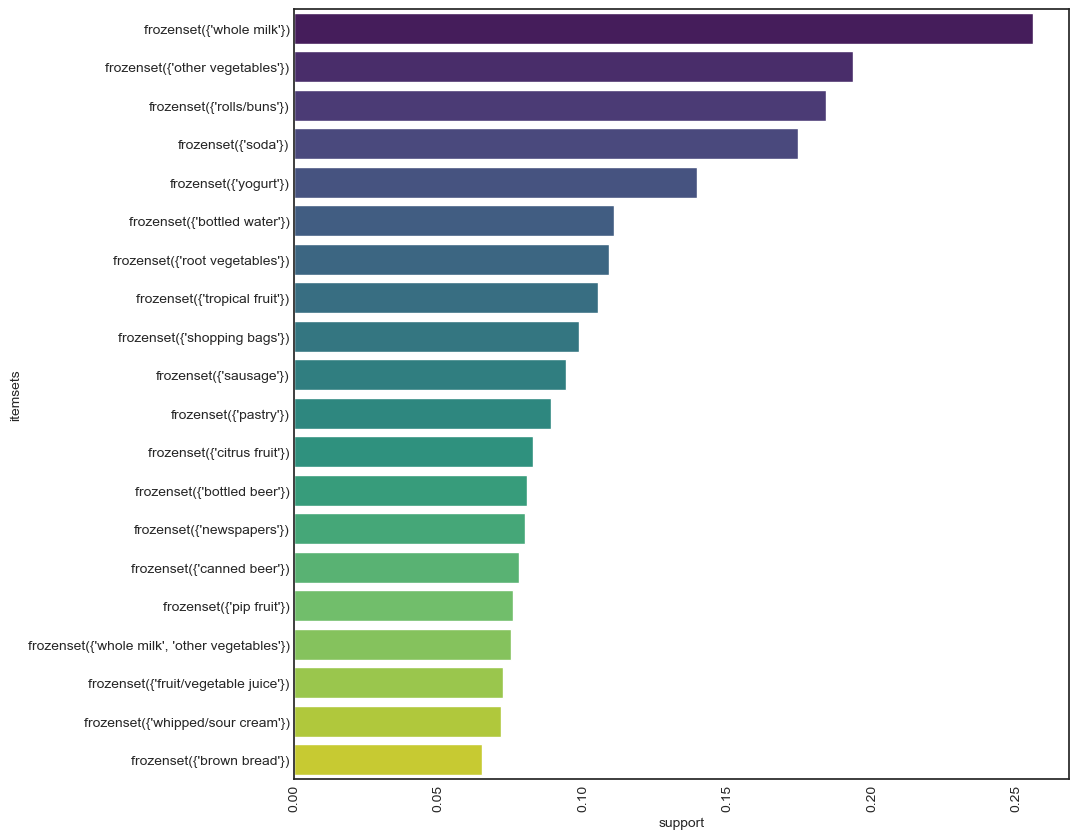

In [34]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.barplot(y='itemsets', x='support', data=frequent_itemsets.nlargest(n = 20, columns = 'support'),palette='viridis')

The itemsets are arranged based on their support levels. The figure above highlight prominent itemsets, notably featuring whole milk and other vegetables, as previously identified in this study. Interestingly, this combination even appears within the top 20. Additionally, three other frequently occurring items are rolls/buns, soda, and yogurt. These items will be monitored closely, as they seem to exhibit significant prevalence.

### Extract Rules

An antecedent is something that comes before a behavior and may trigger that behavior. A behavior is anything an individual does. A consequence is something that follows the behavior. The rules provide the confidence, lift and many more metrics to determine the consequents and antecedents.

First step is to determine the lift threshold to prevent too many rules(i.e to prevent less meaningful rules) from being extracted.

In [35]:
rules_plot_lift = []
for conf in np.linspace(0,4,20):
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=conf)
    rules_plot_lift.append(len(rules))

C:\Users\mounika\AppData\Local\Temp\ipykernel_22584\1384768014.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Text(0, 0.5, 'No of rules')

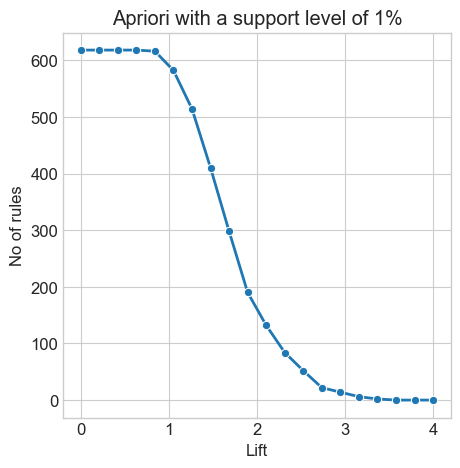

In [36]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize']=5,5 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2
sns.lineplot(x=np.linspace(0,4,20),
             y=rules_plot_lift,
             # style="logic",
             marker='o')
plt.title("Apriori with a support level of 1%")
plt.xlabel('Lift')
plt.ylabel('No of rules')

Lift measures how likely an item is purchased when another item is purchased, while controlling for how popular both items are.
A lift of 1 will then mean that both of the items are actually independent and without any association. For any value higher than 1, lift shows that there is actually an association. The higher the value, the higher the association.

In [63]:
rules_plot_conf = []
for conf in np.linspace(0,1,20):
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=conf)
    rules_plot_conf.append(len(rules))

C:\Users\mounika\AppData\Local\Temp\ipykernel_21580\872268234.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


Text(0, 0.5, 'No of rules')

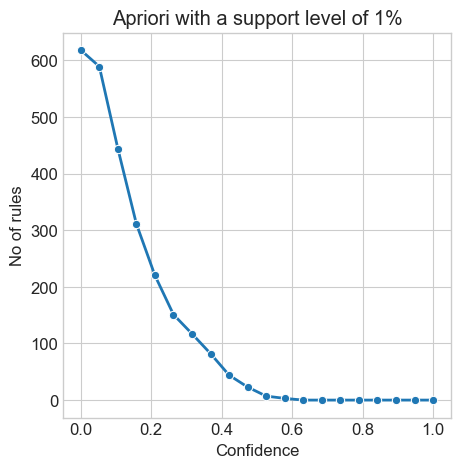

In [64]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize']=5,5 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2
sns.lineplot(x=np.linspace(0,1,20),
             y=rules_plot_conf,
             # style="logic",
             marker='o')
plt.title("Apriori with a support level of 1%")
plt.xlabel('Confidence')
plt.ylabel('No of rules')

The selected metric for analysis was confidence, with a threshold set at 40%, ensuring a balanced result without an overwhelming number of rules. Another evaluation was performed using lift (illustrated in the figure above) to demonstrate the potential increase in the number of rules with a relaxed confidence threshold. The visual representations highlight that readability becomes compromised when extracting more than 70 rules.

### Considering Confidence as metric

In [78]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.30)
rules.sort_values(by=['confidence'], ascending=False).head(100)

antecedents         consequents  \
74      (citrus fruit, root vegetables)  (other vegetables)   
96    (root vegetables, tropical fruit)  (other vegetables)   
80                       (curd, yogurt)        (whole milk)   
72           (other vegetables, butter)        (whole milk)   
118   (root vegetables, tropical fruit)        (whole milk)   
..                                  ...                 ...   
95   (other vegetables, tropical fruit)   (root vegetables)   
42                         (newspapers)        (whole milk)   
50                     (tropical fruit)  (other vegetables)   
101               (sausage, whole milk)  (other vegetables)   
123    (whipped/sour cream, whole milk)            (yogurt)   

     antecedent support  consequent support   support  confidence      lift  \
74             0.017692            0.193493  0.010371    0.586207  3.029608   
96             0.021047            0.193493  0.012303    0.584541  3.020999   
80             0.017285            0.255516  0.010066    0.582353  2.279125   
72             0.020031            0.255516  0.011490    0.573604  2.244885   
118            0.021047            0.255516  0.011998    0.570048  2.230969   
..                  ...                 ...       ...         ...       ...   
95             0.035892            0.108998  0.012303    0.342776  3.144780   
42             0.079817            0.255516  0.027351    0.342675  1.341110   
50             0.104931            0.193493  0.035892    0.342054  1.767790   
101            0.029893            0.193493  0.010168    0.340136  1.757876   
123            0.032232            0.139502  0.010880    0.337539  2.419607   

     leverage  conviction  zhangs_metric  
74   0.006948    1.949059       0.681990  
96   0.008231    1.941244       0.683367  
80   0.005649    1.782567       0.571107  
72   0.006371    1.745992       0.565878  
118  0.006620    1.731553       0.563627  
..        ...         ...            ...  
95   0.008391    1.355705       0.707403  
42   0.006957    1.132597       0.276412  
50   0.015589    1.225796       0.485239  
101  0.004384    1.222233       0.444417  
123  0.006383    1.298943       0.606250  

[100 rows x 10 columns]

In [79]:
rules.shape

(125, 10)

In [66]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.40)
rules.sort_values(by=['confidence'], ascending=False).head(100)

antecedents         consequents  antecedent support  \
28    (citrus fruit, root vegetables)  (other vegetables)            0.017692   
43  (root vegetables, tropical fruit)  (other vegetables)            0.021047   
32                     (curd, yogurt)        (whole milk)            0.017285   
27         (other vegetables, butter)        (whole milk)            0.020031   
58  (root vegetables, tropical fruit)        (whole milk)            0.021047   
..                                ...                 ...                 ...   
48       (whole milk, tropical fruit)  (other vegetables)            0.042298   
21                   (tropical fruit)        (whole milk)            0.104931   
17               (whipped/sour cream)  (other vegetables)            0.071683   
14                              (oil)        (whole milk)            0.028063   
24                           (yogurt)        (whole milk)            0.139502   

    consequent support   support  confidence      lift  leverage  conviction  \
28            0.193493  0.010371    0.586207  3.029608  0.006948    1.949059   
43            0.193493  0.012303    0.584541  3.020999  0.008231    1.941244   
32            0.255516  0.010066    0.582353  2.279125  0.005649    1.782567   
27            0.255516  0.011490    0.573604  2.244885  0.006371    1.745992   
58            0.255516  0.011998    0.570048  2.230969  0.006620    1.731553   
..                 ...       ...         ...       ...       ...         ...   
48            0.193493  0.017082    0.403846  2.087140  0.008898    1.352851   
21            0.255516  0.042298    0.403101  1.577595  0.015486    1.247252   
17            0.193493  0.028876    0.402837  2.081924  0.015006    1.350565   
14            0.255516  0.011286    0.402174  1.573968  0.004116    1.245319   
24            0.255516  0.056024    0.401603  1.571735  0.020379    1.244132   

    zhangs_metric  
28       0.681990  
43       0.683367  
32       0.571107  
27       0.565878  
58       0.563627  
..            ...  
48       0.543880  
21       0.409045  
17       0.559803  
14       0.375192  
24       0.422732  

[62 rows x 10 columns]

In [103]:
rules.shape

(62, 10)

We get 62 rules here from taking confidence as a metric with threshold at 0.4 which is manageable.

In [67]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequent_len"] = rules["consequents"].apply(lambda x: len(x))
rules['rule'] = rules.index
rules.drop(['antecedent support','consequent support','conviction','antecedent_len','consequent_len'],axis=1).sort_values(by=['confidence'], ascending=False).head(100)

antecedents         consequents   support  \
28    (citrus fruit, root vegetables)  (other vegetables)  0.010371   
43  (root vegetables, tropical fruit)  (other vegetables)  0.012303   
32                     (curd, yogurt)        (whole milk)  0.010066   
27         (other vegetables, butter)        (whole milk)  0.011490   
58  (root vegetables, tropical fruit)        (whole milk)  0.011998   
..                                ...                 ...       ...   
48       (whole milk, tropical fruit)  (other vegetables)  0.017082   
21                   (tropical fruit)        (whole milk)  0.042298   
17               (whipped/sour cream)  (other vegetables)  0.028876   
14                              (oil)        (whole milk)  0.011286   
24                           (yogurt)        (whole milk)  0.056024   

    confidence      lift  leverage  zhangs_metric  rule  
28    0.586207  3.029608  0.006948       0.681990    28  
43    0.584541  3.020999  0.008231       0.683367    43  
32    0.582353  2.279125  0.005649       0.571107    32  
27    0.573604  2.244885  0.006371       0.565878    27  
58    0.570048  2.230969  0.006620       0.563627    58  
..         ...       ...       ...            ...   ...  
48    0.403846  2.087140  0.008898       0.543880    48  
21    0.403101  1.577595  0.015486       0.409045    21  
17    0.402837  2.081924  0.015006       0.559803    17  
14    0.402174  1.573968  0.004116       0.375192    14  
24    0.401603  1.571735  0.020379       0.422732    24  

[62 rows x 8 columns]

C:\Users\mounika\AppData\Local\Temp\ipykernel_21580\1955057995.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


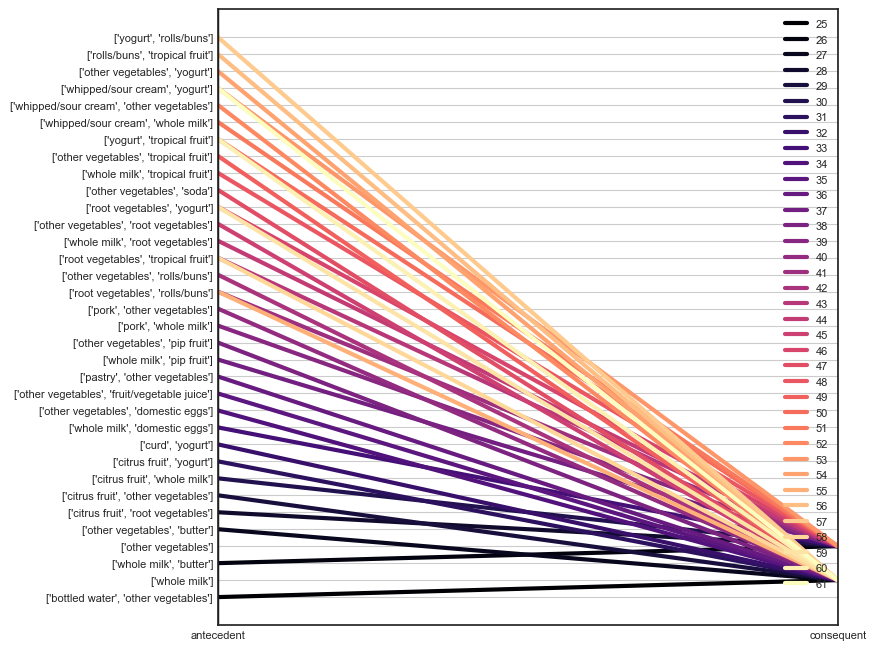

In [69]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=8,8 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 8
plt.rcParams['lines.linewidth'] = 3

from pandas.plotting import parallel_coordinates
rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: str(list(antecedent)))
rules['consequent'] = rules['consequents'].apply(lambda consequent: str(list(consequent)))
coords = rules[['antecedent','consequent','rule']][rules['antecedent_len']>1]

parallel_coordinates(coords,'rule', colormap = 'magma')
plt.show()

The parallel coordinates plot presented illustrates that the most strongly associated consequents are whole milk and other vegetables in rules with a support greater than 0.01, confidence level exceeding 40%, and a minimum of two antecedents. Notably, it is intriguing that, in this instance, there are no consequents with a length of 2 or more. The plot indicates the existence of specific itemsets leading to both consequents, although clarity on this aspect could be enhanced with an alternative visualization.

In [71]:
rules.drop(['antecedent support','consequent support','conviction','antecedent_len','consequent_len'],axis=1)[rules['antecedent_len'] >= 2].head(20)

antecedents         consequents   support  \
25          (bottled water, other vegetables)        (whole milk)  0.010778   
26                       (whole milk, butter)  (other vegetables)  0.011490   
27                 (other vegetables, butter)        (whole milk)  0.011490   
28            (citrus fruit, root vegetables)  (other vegetables)  0.010371   
29           (citrus fruit, other vegetables)        (whole milk)  0.013015   
30                 (citrus fruit, whole milk)  (other vegetables)  0.013015   
31                     (citrus fruit, yogurt)        (whole milk)  0.010269   
32                             (curd, yogurt)        (whole milk)  0.010066   
33                (whole milk, domestic eggs)  (other vegetables)  0.012303   
34          (other vegetables, domestic eggs)        (whole milk)  0.012303   
35  (other vegetables, fruit/vegetable juice)        (whole milk)  0.010473   
36                 (pastry, other vegetables)        (whole milk)  0.010574   
37                    (whole milk, pip fruit)  (other vegetables)  0.013523   
38              (other vegetables, pip fruit)        (whole milk)  0.013523   
39                         (pork, whole milk)  (other vegetables)  0.010168   
40                   (pork, other vegetables)        (whole milk)  0.010168   
41              (root vegetables, rolls/buns)  (other vegetables)  0.012201   
42             (other vegetables, rolls/buns)        (whole milk)  0.017895   
43          (root vegetables, tropical fruit)  (other vegetables)  0.012303   
44              (whole milk, root vegetables)  (other vegetables)  0.023183   

    confidence      lift  leverage  zhangs_metric  rule  \
25    0.434426  1.700192  0.004439       0.422308    25   
26    0.416974  2.154987  0.006158       0.551147    26   
27    0.573604  2.244885  0.006371       0.565878    27   
28    0.586207  3.029608  0.006948       0.681990    28   
29    0.450704  1.763898  0.005636       0.445951    29   
30    0.426667  2.205080  0.007113       0.563696    30   
31    0.474178  1.855768  0.004736       0.471348    31   
32    0.582353  2.279125  0.005649       0.571107    32   
33    0.410169  2.119820  0.006499       0.544597    33   
34    0.552511  2.162336  0.006613       0.549779    34   
35    0.497585  1.947371  0.005095       0.496947    35   
36    0.468468  1.833421  0.004807       0.465069    36   
37    0.449324  2.322178  0.007700       0.587038    37   
38    0.517510  2.025351  0.006846       0.519843    38   
39    0.458716  2.370714  0.005879       0.591293    39   
40    0.469484  1.837394  0.004634       0.465840    40   
41    0.502092  2.594890  0.007499       0.629935    41   
42    0.420048  1.643919  0.007010       0.409128    42   
43    0.584541  3.020999  0.008231       0.683367    43   
44    0.474012  2.449770  0.013719       0.622230    44   

                                       antecedent            consequent  
25          ['bottled water', 'other vegetables']        ['whole milk']  
26                       ['whole milk', 'butter']  ['other vegetables']  
27                 ['other vegetables', 'butter']        ['whole milk']  
28            ['citrus fruit', 'root vegetables']  ['other vegetables']  
29           ['citrus fruit', 'other vegetables']        ['whole milk']  
30                 ['citrus fruit', 'whole milk']  ['other vegetables']  
31                     ['citrus fruit', 'yogurt']        ['whole milk']  
32                             ['curd', 'yogurt']        ['whole milk']  
33                ['whole milk', 'domestic eggs']  ['other vegetables']  
34          ['other vegetables', 'domestic eggs']        ['whole milk']  
35  ['other vegetables', 'fruit/vegetable juice']        ['whole milk']  
36                 ['pastry', 'other vegetables']        ['whole milk']  
37                    ['whole milk', 'pip fruit']  ['other vegetables']  
38              ['other vegetables', 'pip fruit']        ['whole milk']  
39                      

The pairplot presented offers insights into the relationship between various metrics. However, it provides limited information about the associations between items. Of particular interest is the observed low correlation between support and confidence. Additionally, it is noteworthy that the rules lack a specific arrangement when considering support and confidence, although a discernible pattern emerges when examining lift and confidence.

A better approach we could come up with is to draw network diagrams.

C:\Users\mounika\AppData\Local\Temp\ipykernel_21580\1905135183.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


<Figure size 1000x1000 with 0 Axes>

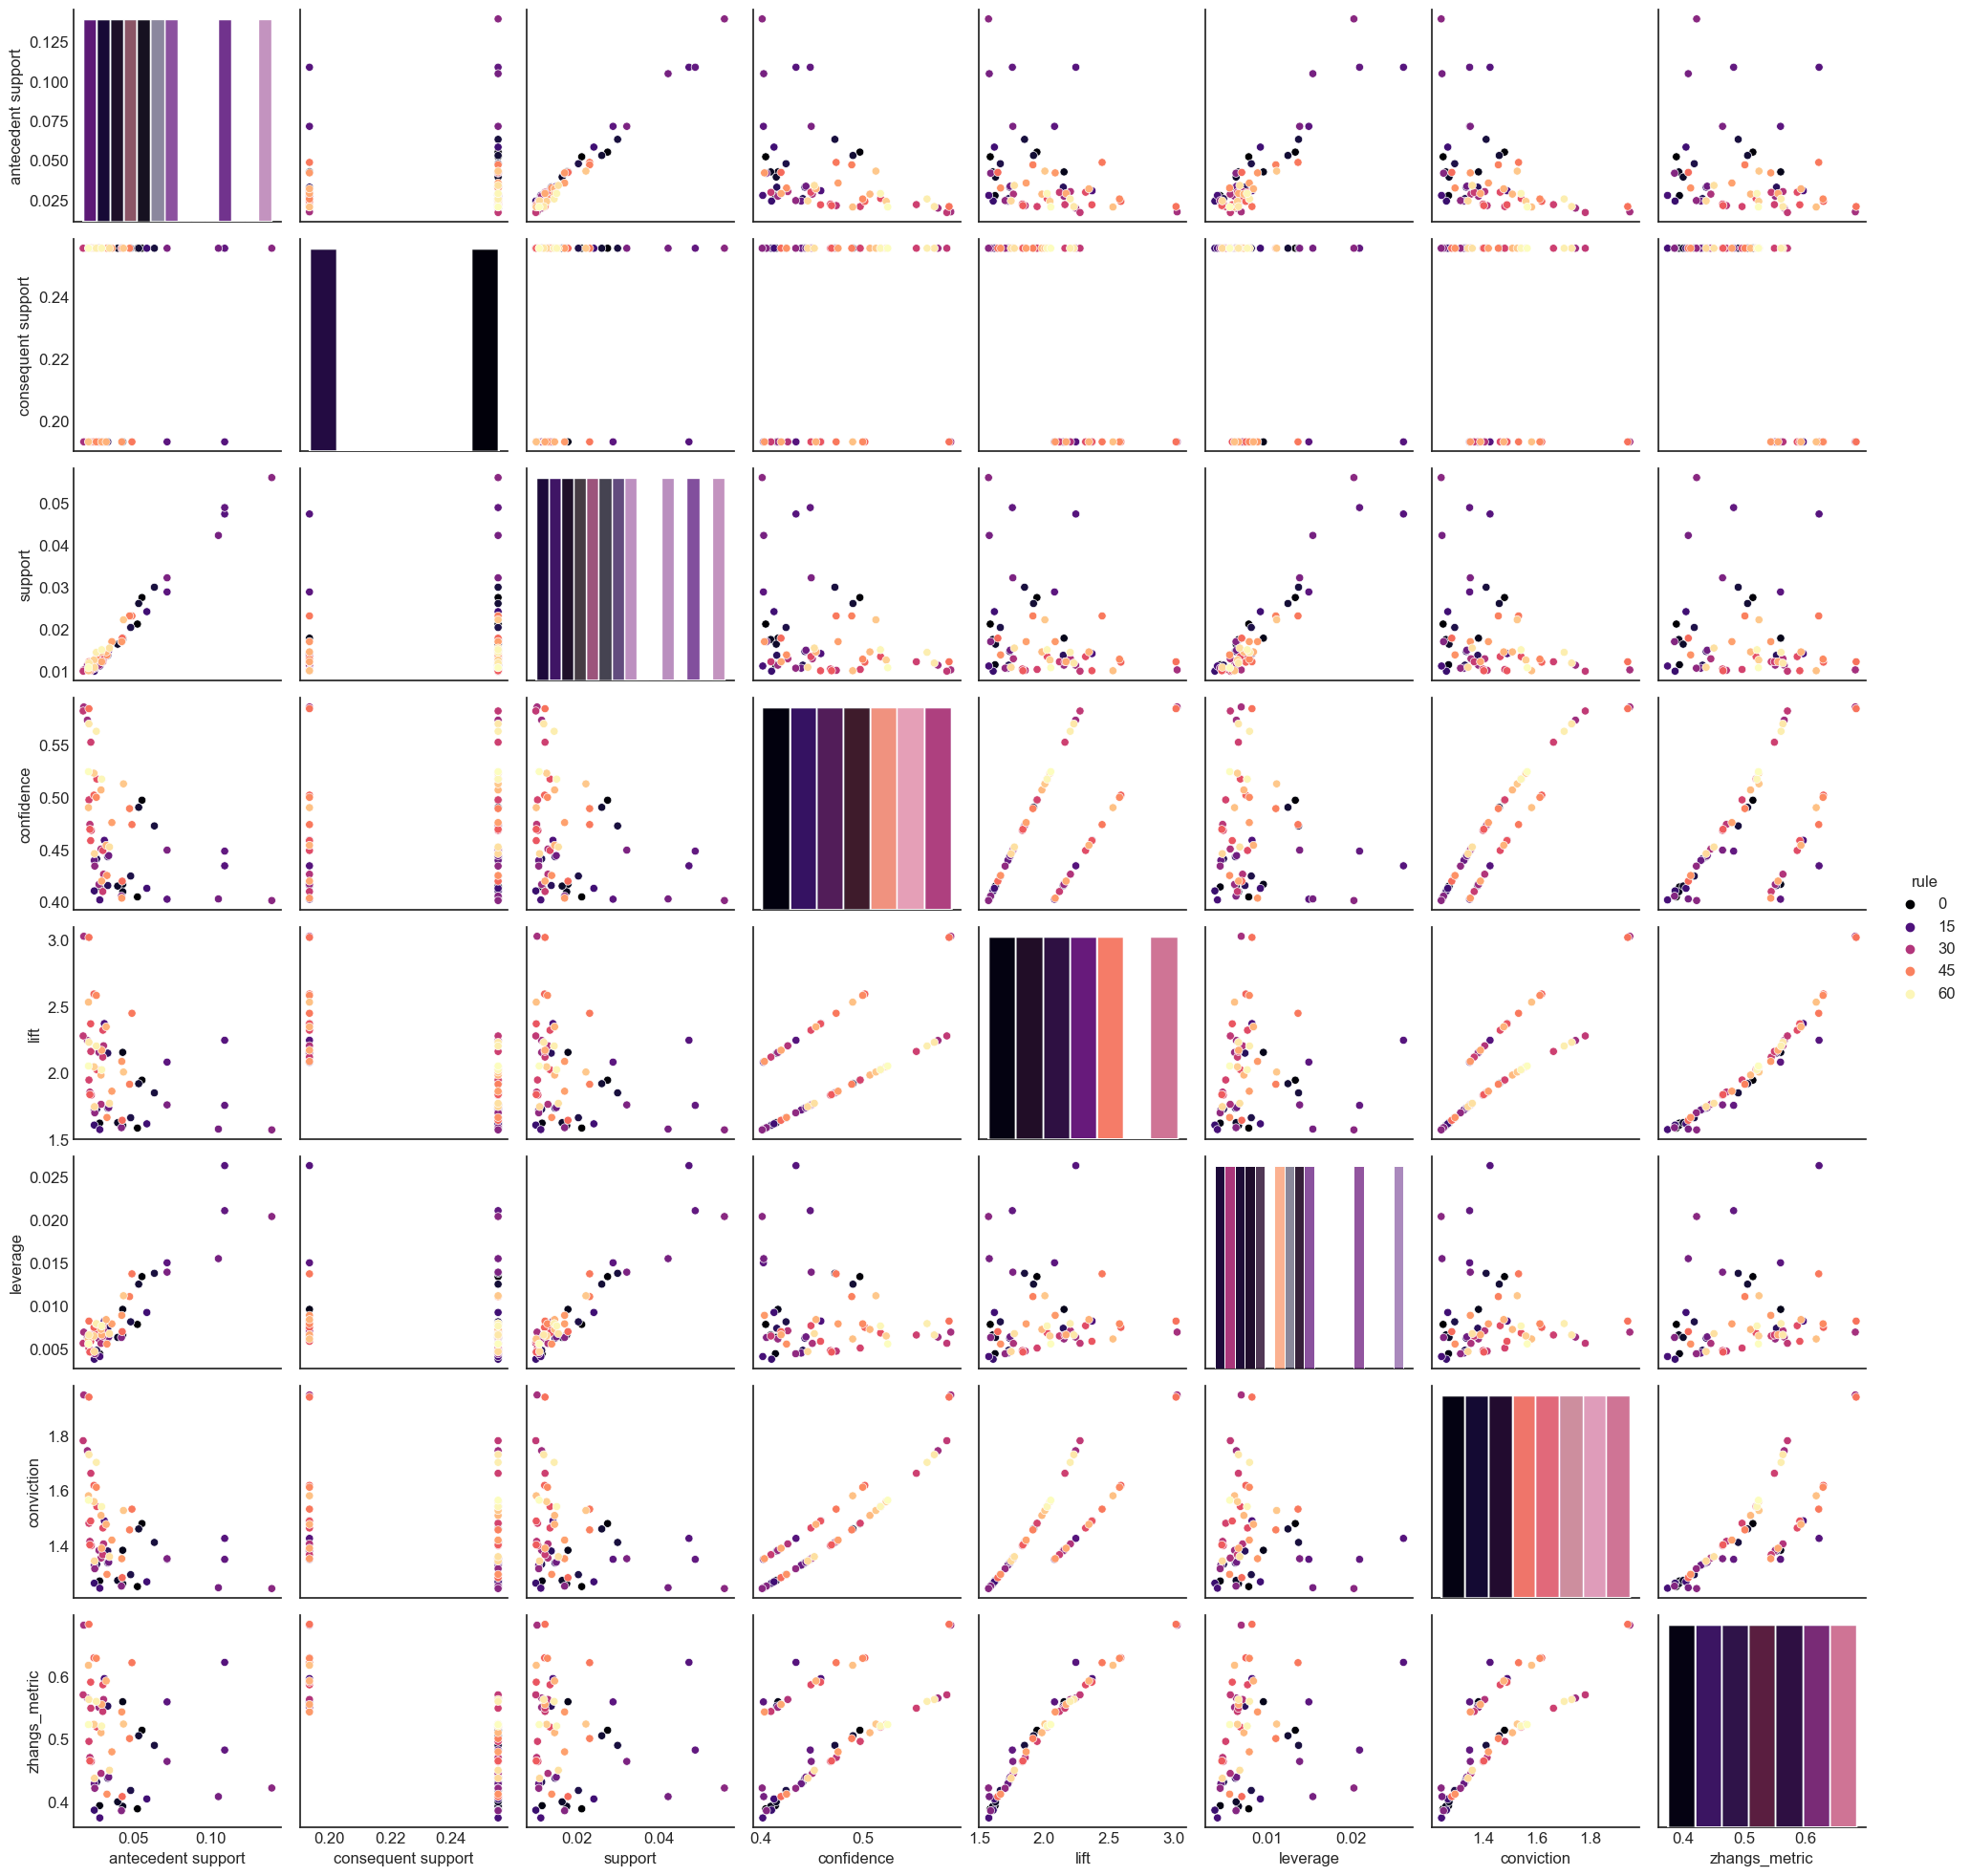

<Figure size 800x800 with 0 Axes>

In [70]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=8,8 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 3

plt.figure(figsize=(10,10))
sns.set_style('white')
plot_kws={"s": 1}
g = sns.pairplot(
             rules.drop(['antecedent_len','consequent_len'],axis=1),
             # kind='reg',
             diag_kind='hist',
             corner=False,
             # plot_kws=dict(scatter_kws=dict(s=5)),
             palette='magma',
             hue='rule'
            )


plt.show()
sns.despine()

In [72]:
import networkx as nx
rules.sort_values(['confidence']).head()

antecedents         consequents  antecedent support  \
24                      (yogurt)        (whole milk)            0.139502   
14                         (oil)        (whole milk)            0.028063   
17          (whipped/sour cream)  (other vegetables)            0.071683   
21              (tropical fruit)        (whole milk)            0.104931   
48  (whole milk, tropical fruit)  (other vegetables)            0.042298   

    consequent support   support  confidence      lift  leverage  conviction  \
24            0.255516  0.056024    0.401603  1.571735  0.020379    1.244132   
14            0.255516  0.011286    0.402174  1.573968  0.004116    1.245319   
17            0.193493  0.028876    0.402837  2.081924  0.015006    1.350565   
21            0.255516  0.042298    0.403101  1.577595  0.015486    1.247252   
48            0.193493  0.017082    0.403846  2.087140  0.008898    1.352851   

    zhangs_metric  antecedent_len  consequent_len  rule  \
24       0.422732               1               1    24   
14       0.375192               1               1    14   
17       0.559803               1               1    17   
21       0.409045               1               1    21   
48       0.543880               2               1    48   

                          antecedent            consequent  
24                        ['yogurt']        ['whole milk']  
14                           ['oil']        ['whole milk']  
17            ['whipped/sour cream']  ['other vegetables']  
21                ['tropical fruit']        ['whole milk']  
48  ['whole milk', 'tropical fruit']  ['other vegetables']

In [73]:
G = nx.from_pandas_edgelist(rules,
                            source='antecedent',
                            target='consequent',
                            edge_attr='confidence'
                            # edge_attr=True
                           )

 Whole milk and other vegetables seem to be strong nodes (consequents) that follow from most purchased items.

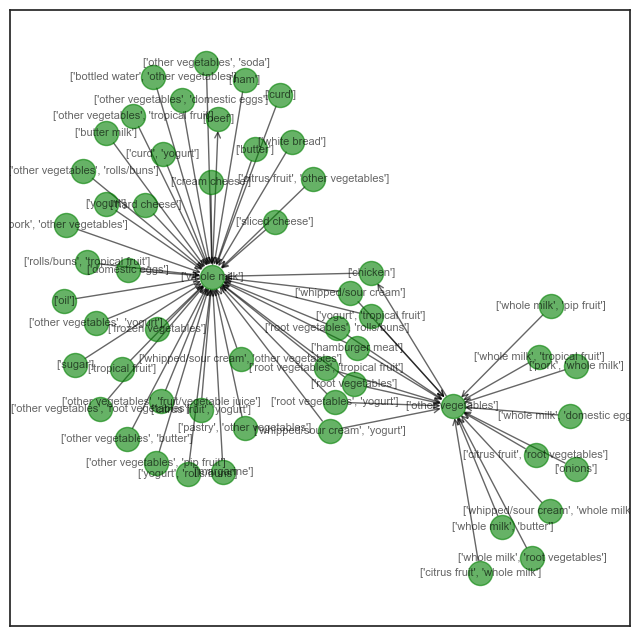

In [76]:
nx.draw_networkx(G,
                 arrows=True,
                 arrowstyle='<-',
                 with_labels=True,
                 cmap='magma',
                 alpha=0.6,
                 edge_color='black',
                 font_size=8,
                 node_color='green'
                 # 
                )

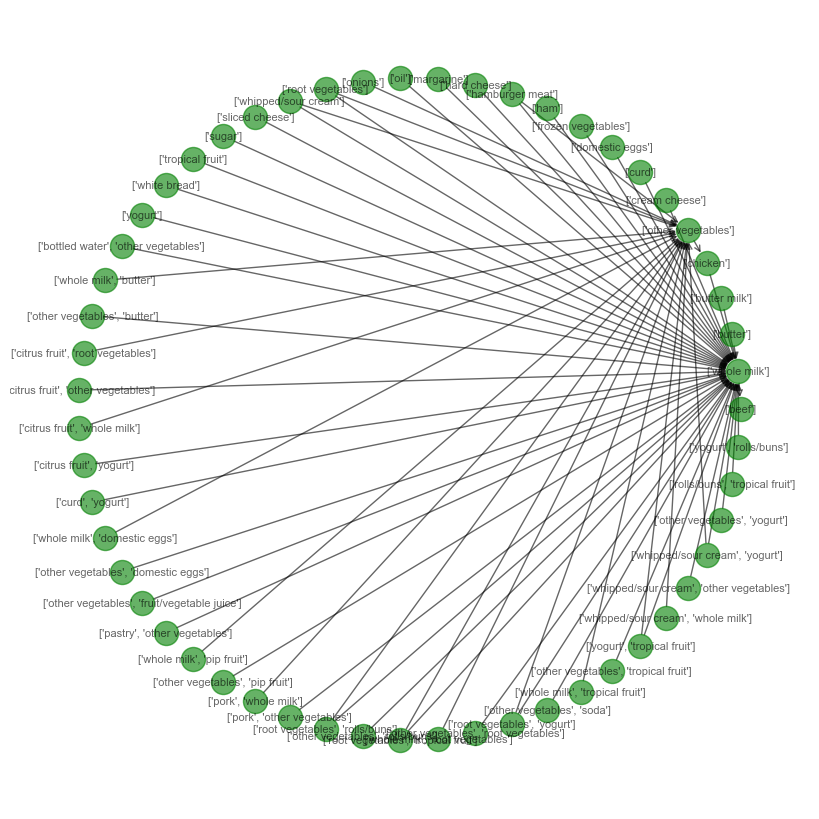

In [77]:
nx.draw_circular(G,
                 arrows=True,
                 arrowstyle='<-',
                 with_labels=True,
                 cmap='magma',
                 alpha=0.6,
                 edge_color='black',
                 font_size=8,
                 node_color='green'
                 # 
                )

C:\Users\mounika\anaconda3\Lib\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


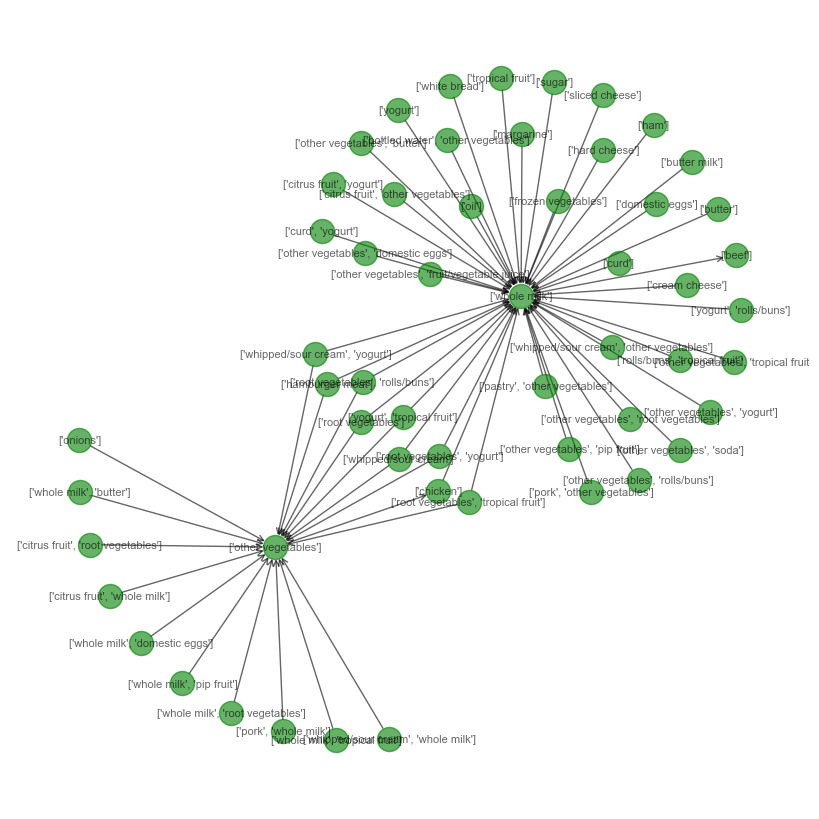

In [80]:
plt.rcParams['figure.figsize']=8,8
nx.draw_kamada_kawai(G,
                 arrows=True,
                 arrowstyle='<-',
                 with_labels=True,
                 cmap='magma',
                 alpha=0.6,
                 edge_color='black',
                 font_size=8,
                 node_color='green',
                )

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

def catscatter(df,colx,coly,cols,color=['grey','black'],ratio=10,font='Arial',save=False,save_name='Default'):
    '''
    Goal: This function create an scatter plot for categorical variables. It's useful to compare two lists with elements in common.
    Input:
        - df: required. pandas DataFrame with at least two columns with categorical variables you want to relate, and the value of both (if it's just an adjacent matrix write 1)
        - colx: required. The name of the column to display horizontaly
        - coly: required. The name of the column to display vertically
        - cols: required. The name of the column with the value between the two variables
        - color: optional. Colors to display in the visualization, the length can be two or three. The two first are the colors for the lines in the matrix, the last one the font color and markers color.
            default ['grey','black']
        - ratio: optional. A ratio for controlling the relative size of the markers.
            default 10
        - font: optional. The font for the ticks on the matrix.
            default 'Helvetica'
        - save: optional. True for saving as an image in the same path as the code.
            default False
        - save_name: optional. The name used for saving the image (then the code ads .png)
            default: "Default"
    Output:
        No output. Matplotlib object is not shown by default to be able to add more changes.
    '''
    # Create a dict to encode the categeories into numbers (sorted)
    colx_codes=dict(zip(df[colx].sort_values().unique(),range(len(df[colx].unique()))))
    coly_codes=dict(zip(df[coly].sort_values(ascending=False).unique(),range(len(df[coly].unique()))))
    
    
    # Apply the encoding
    df[colx]=df[colx].apply(lambda x: colx_codes[x])
    df[coly]=df[coly].apply(lambda x: coly_codes[x])
    
    
    # Prepare the aspect of the plot
    plt.rcParams['figure.figsize']=10,3 
    plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
    plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
    plt.rcParams['font.sans-serif']=font
    plt.rcParams['xtick.color']='darkslategrey'
    plt.rcParams['ytick.color']='darkslategrey'
    plt.box(False)

    
    # Plot all the lines for the background
    for num in range(len(coly_codes)):
        plt.hlines(num,-1,len(colx_codes)+1,linewidth=0.5,color='lightgray',alpha=0.8)
    for num in range(len(colx_codes)):
        plt.vlines(num,-1,len(coly_codes)+1,linewidth=0.5,color='lightgray',alpha=0.8)
        
    # Plot the scatter plot with the numbers
    plt.scatter(df[colx],
               df[coly],
               s=df[cols]*ratio,
               zorder=2,
               color='gray')
    
    # Change the ticks numbers to categories and limit them
    plt.xticks(ticks=list(colx_codes.values()),labels=colx_codes.keys(),rotation=90)
    plt.yticks(ticks=list(coly_codes.values()),labels=coly_codes.keys())
    plt.xlim(xmin=-1,xmax=len(colx_codes))
    plt.ylim(ymin=-1,ymax=len(coly_codes))

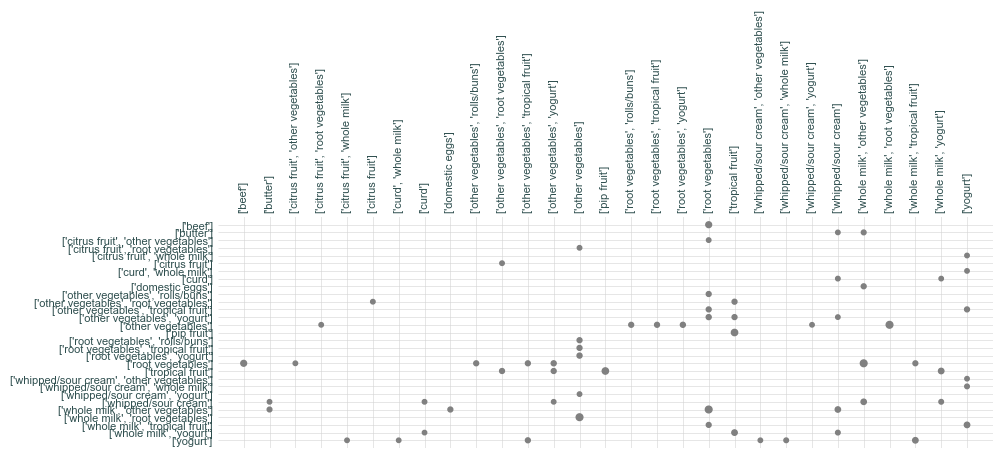

In [109]:
kcolors=['#F73972','#F2B3C6','#144962']
# create the plot
catscatter(rules,'antecedent','consequent','support',color=kcolors, ratio=1000)
rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: str(list(antecedent)))
rules['consequent'] = rules['consequents'].apply(lambda consequent: str(list(consequent)))
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

In the depicted category scatterplot, whole milk emerges as the most prevalent consequent (y-axis). The size of the marks on the chart, indicating support, underscores that root vegetables exhibit the highest support for both whole milk and other vegetables. Furthermore, yogurt stands out as the next substantial contributor to the support for whole milk.

Lift as Metric

In [89]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=2.40)
rules.sort_values(by=['confidence'], ascending=False).head(100)

antecedents                        consequents  \
11    (citrus fruit, root vegetables)                 (other vegetables)   
30  (root vegetables, tropical fruit)                 (other vegetables)   
25      (root vegetables, rolls/buns)                 (other vegetables)   
39          (root vegetables, yogurt)                 (other vegetables)   
49       (whipped/sour cream, yogurt)                 (other vegetables)   
..                                ...                                ...   
40                 (other vegetables)          (root vegetables, yogurt)   
31                 (other vegetables)  (root vegetables, tropical fruit)   
26                 (other vegetables)      (root vegetables, rolls/buns)   
14                 (other vegetables)    (citrus fruit, root vegetables)   
52                 (other vegetables)       (whipped/sour cream, yogurt)   

    antecedent support  consequent support   support  confidence      lift  \
11            0.017692            0.193493  0.010371    0.586207  3.029608   
30            0.021047            0.193493  0.012303    0.584541  3.020999   
25            0.024301            0.193493  0.012201    0.502092  2.594890   
39            0.025826            0.193493  0.012913    0.500000  2.584078   
49            0.020742            0.193493  0.010168    0.490196  2.533410   
..                 ...                 ...       ...         ...       ...   
40            0.193493            0.025826  0.012913    0.066737  2.584078   
31            0.193493            0.021047  0.012303    0.063584  3.020999   
26            0.193493            0.024301  0.012201    0.063058  2.594890   
14            0.193493            0.017692  0.010371    0.053600  3.029608   
52            0.193493            0.020742  0.010168    0.052549  2.533410   

    leverage  conviction  zhangs_metric  
11  0.006948    1.949059       0.681990  
30  0.008231    1.941244       0.683367  
25  0.007499    1.619792       0.629935  
39  0.007916    1.613015       0.629266  
49  0.006154    1.581995       0.618096  
..       ...         ...            ...  
40  0.007916    1.043836       0.760086  
31  0.008231    1.045425       0.829482  
26  0.007499    1.041366       0.762085  
14  0.006948    1.037941       0.830649  
52  0.006154    1.033570       0.750489  

[64 rows x 10 columns]

In [90]:
rules.shape

(64, 10)

Here, we considered Lift as the metric, where a minimum threshold of 2.4 is chosen to keep the number of rules (64) manageable

Soda is then still absent from the rules shown in the table below. This is unexpected.

In [91]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequent_len"] = rules["consequents"].apply(lambda x: len(x))
rules['rule'] = rules.index
rules.drop(['antecedent support','consequent support','conviction','antecedent_len','consequent_len'],axis=1).sort_values(by=['confidence'], ascending=False).head(100)

antecedents                        consequents  \
11    (citrus fruit, root vegetables)                 (other vegetables)   
30  (root vegetables, tropical fruit)                 (other vegetables)   
25      (root vegetables, rolls/buns)                 (other vegetables)   
39          (root vegetables, yogurt)                 (other vegetables)   
49       (whipped/sour cream, yogurt)                 (other vegetables)   
..                                ...                                ...   
40                 (other vegetables)          (root vegetables, yogurt)   
31                 (other vegetables)  (root vegetables, tropical fruit)   
26                 (other vegetables)      (root vegetables, rolls/buns)   
14                 (other vegetables)    (citrus fruit, root vegetables)   
52                 (other vegetables)       (whipped/sour cream, yogurt)   

     support  confidence      lift  leverage  zhangs_metric  rule  
11  0.010371    0.586207  3.029608  0.006948       0.681990    11  
30  0.012303    0.584541  3.020999  0.008231       0.683367    30  
25  0.012201    0.502092  2.594890  0.007499       0.629935    25  
39  0.012913    0.500000  2.584078  0.007916       0.629266    39  
49  0.010168    0.490196  2.533410  0.006154       0.618096    49  
..       ...         ...       ...       ...            ...   ...  
40  0.012913    0.066737  2.584078  0.007916       0.760086    40  
31  0.012303    0.063584  3.020999  0.008231       0.829482    31  
26  0.012201    0.063058  2.594890  0.007499       0.762085    26  
14  0.010371    0.053600  3.029608  0.006948       0.830649    14  
52  0.010168    0.052549  2.533410  0.006154       0.750489    52  

[64 rows x 8 columns]

The parallel coordinates plot depicted illustrates that the most interconnected consequents are whole milk and other vegetables in rules with a support exceeding 0.01, lift levels surpassing 2.4, and at least two antecedents. Remarkably, in this context, no consequents have a length of 2 or more. Although there are indications of specific itemsets leading to both consequents, a different visualization will be employed for a clearer understanding.

C:\Users\mounika\AppData\Local\Temp\ipykernel_21580\1955057995.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


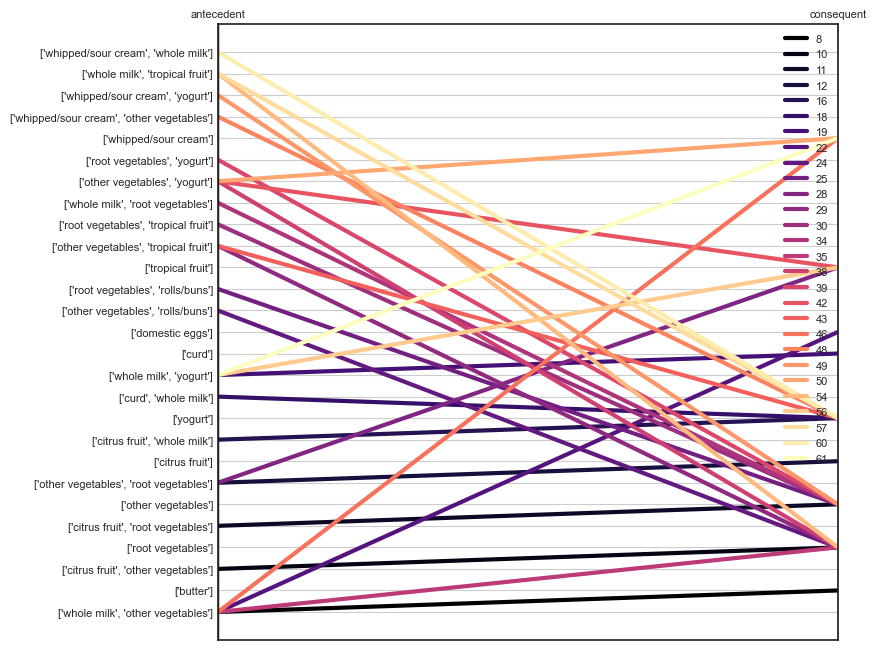

In [93]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=8,8 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 8
plt.rcParams['lines.linewidth'] = 3

from pandas.plotting import parallel_coordinates
rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: str(list(antecedent)))
rules['consequent'] = rules['consequents'].apply(lambda consequent: str(list(consequent)))
coords = rules[['antecedent','consequent','rule']][rules['antecedent_len']>1]

parallel_coordinates(coords,'rule', colormap = 'magma')
plt.show()

In [94]:
rules.drop(['antecedent support','consequent support','conviction','antecedent_len','consequent_len'],axis=1)[rules['antecedent_len'] >= 2].head(20)

antecedents           consequents   support  \
8        (whole milk, other vegetables)              (butter)  0.011490   
10     (citrus fruit, other vegetables)     (root vegetables)  0.010371   
11      (citrus fruit, root vegetables)    (other vegetables)  0.010371   
12  (other vegetables, root vegetables)        (citrus fruit)  0.010371   
16           (citrus fruit, whole milk)              (yogurt)  0.010269   
18                   (curd, whole milk)              (yogurt)  0.010066   
19                 (whole milk, yogurt)                (curd)  0.010066   
22       (whole milk, other vegetables)       (domestic eggs)  0.012303   
24       (other vegetables, rolls/buns)     (root vegetables)  0.012201   
25        (root vegetables, rolls/buns)    (other vegetables)  0.012201   
28  (other vegetables, root vegetables)      (tropical fruit)  0.012303   
29   (other vegetables, tropical fruit)     (root vegetables)  0.012303   
30    (root vegetables, tropical fruit)    (other vegetables)  0.012303   
34        (whole milk, root vegetables)    (other vegetables)  0.023183   
35       (whole milk, other vegetables)     (root vegetables)  0.023183   
38           (other vegetables, yogurt)     (root vegetables)  0.012913   
39            (root vegetables, yogurt)    (other vegetables)  0.012913   
42           (other vegetables, yogurt)      (tropical fruit)  0.012303   
43   (other vegetables, tropical fruit)              (yogurt)  0.012303   
46       (whole milk, other vegetables)  (whipped/sour cream)  0.014642   

    confidence      lift  leverage  zhangs_metric  rule  \
8     0.153533  2.770630  0.007343       0.690764     8   
10    0.359155  3.295045  0.007224       0.717225    10   
11    0.586207  3.029608  0.006948       0.681990    11   
12    0.218884  2.644626  0.006450       0.652806    12   
16    0.336667  2.413350  0.006014       0.604064    16   
18    0.385214  2.761356  0.006421       0.654974    18   
19    0.179673  3.372304  0.007081       0.745217    19   
22    0.164402  2.591178  0.007555       0.663747    22   
24    0.286396  2.627525  0.007558       0.646977    24   
25    0.502092  2.594890  0.007499       0.629935    25   
28    0.259657  2.474538  0.007331       0.625523    28   
29    0.342776  3.144780  0.008391       0.707403    29   
30    0.584541  3.020999  0.008231       0.683367    30   
34    0.474012  2.449770  0.013719       0.622230    34   
35    0.309783  2.842082  0.015026       0.700572    35   
38    0.297424  2.728698  0.008181       0.662279    38   
39    0.500000  2.584078  0.007916       0.629266    39   
42    0.283372  2.700550  0.007747       0.658285    42   
43    0.342776  2.457146  0.007296       0.615101    43   
46    0.195652  2.729417  0.009277       0.684874    46   

                                 antecedent              consequent  
8        ['whole milk', 'other vegetables']              ['butter']  
10     ['citrus fruit', 'other vegetables']     ['root vegetables']  
11      ['citrus fruit', 'root vegetables']    ['other vegetables']  
12  ['other vegetables', 'root vegetables']        ['citrus fruit']  
16           ['citrus fruit', 'whole milk']              ['yogurt']  
18                   ['curd', 'whole milk']              ['yogurt']  
19                 ['whole milk', 'yogurt']                ['curd']  
22       ['whole milk', 'other vegetables']       ['domestic eggs']  
24       ['other vegetables', 'rolls/buns']     ['root vegetables']  
25        ['root vegetables', 'rolls/buns']    ['other vegetables']  
28  ['other vegetables', 'root vegetables']      ['tropical fruit']  
29   ['other vegetables', 'tropical fruit']     ['root vegetables']  
30    ['root vegetables', 'tropical fruit']    ['other vegetables']  
34        ['whole milk', 'root vegetables']    ['other vegetables']  
35       ['whole milk', 'other vegetables']     ['root vegetables']  
38           ['other vegetables', 'yogurt']     ['root vegetables']  
39            ['root v

In this section, we visualize the rules in an attempt to gain insights.

The pairplot presented illustrates the relationships between various metrics. While intriguing, it provides limited information about the associations between items. Notably, a noteworthy aspect is the low correlation observed between support and confidence. Additionally, it's interesting to observe that rules lack a specific arrangement when considering support and confidence, although a discernible pattern emerges for lift and confidence.

A better approach we could come up with is to draw network diagrams.

C:\Users\mounika\AppData\Local\Temp\ipykernel_21580\1905135183.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


<Figure size 1000x1000 with 0 Axes>

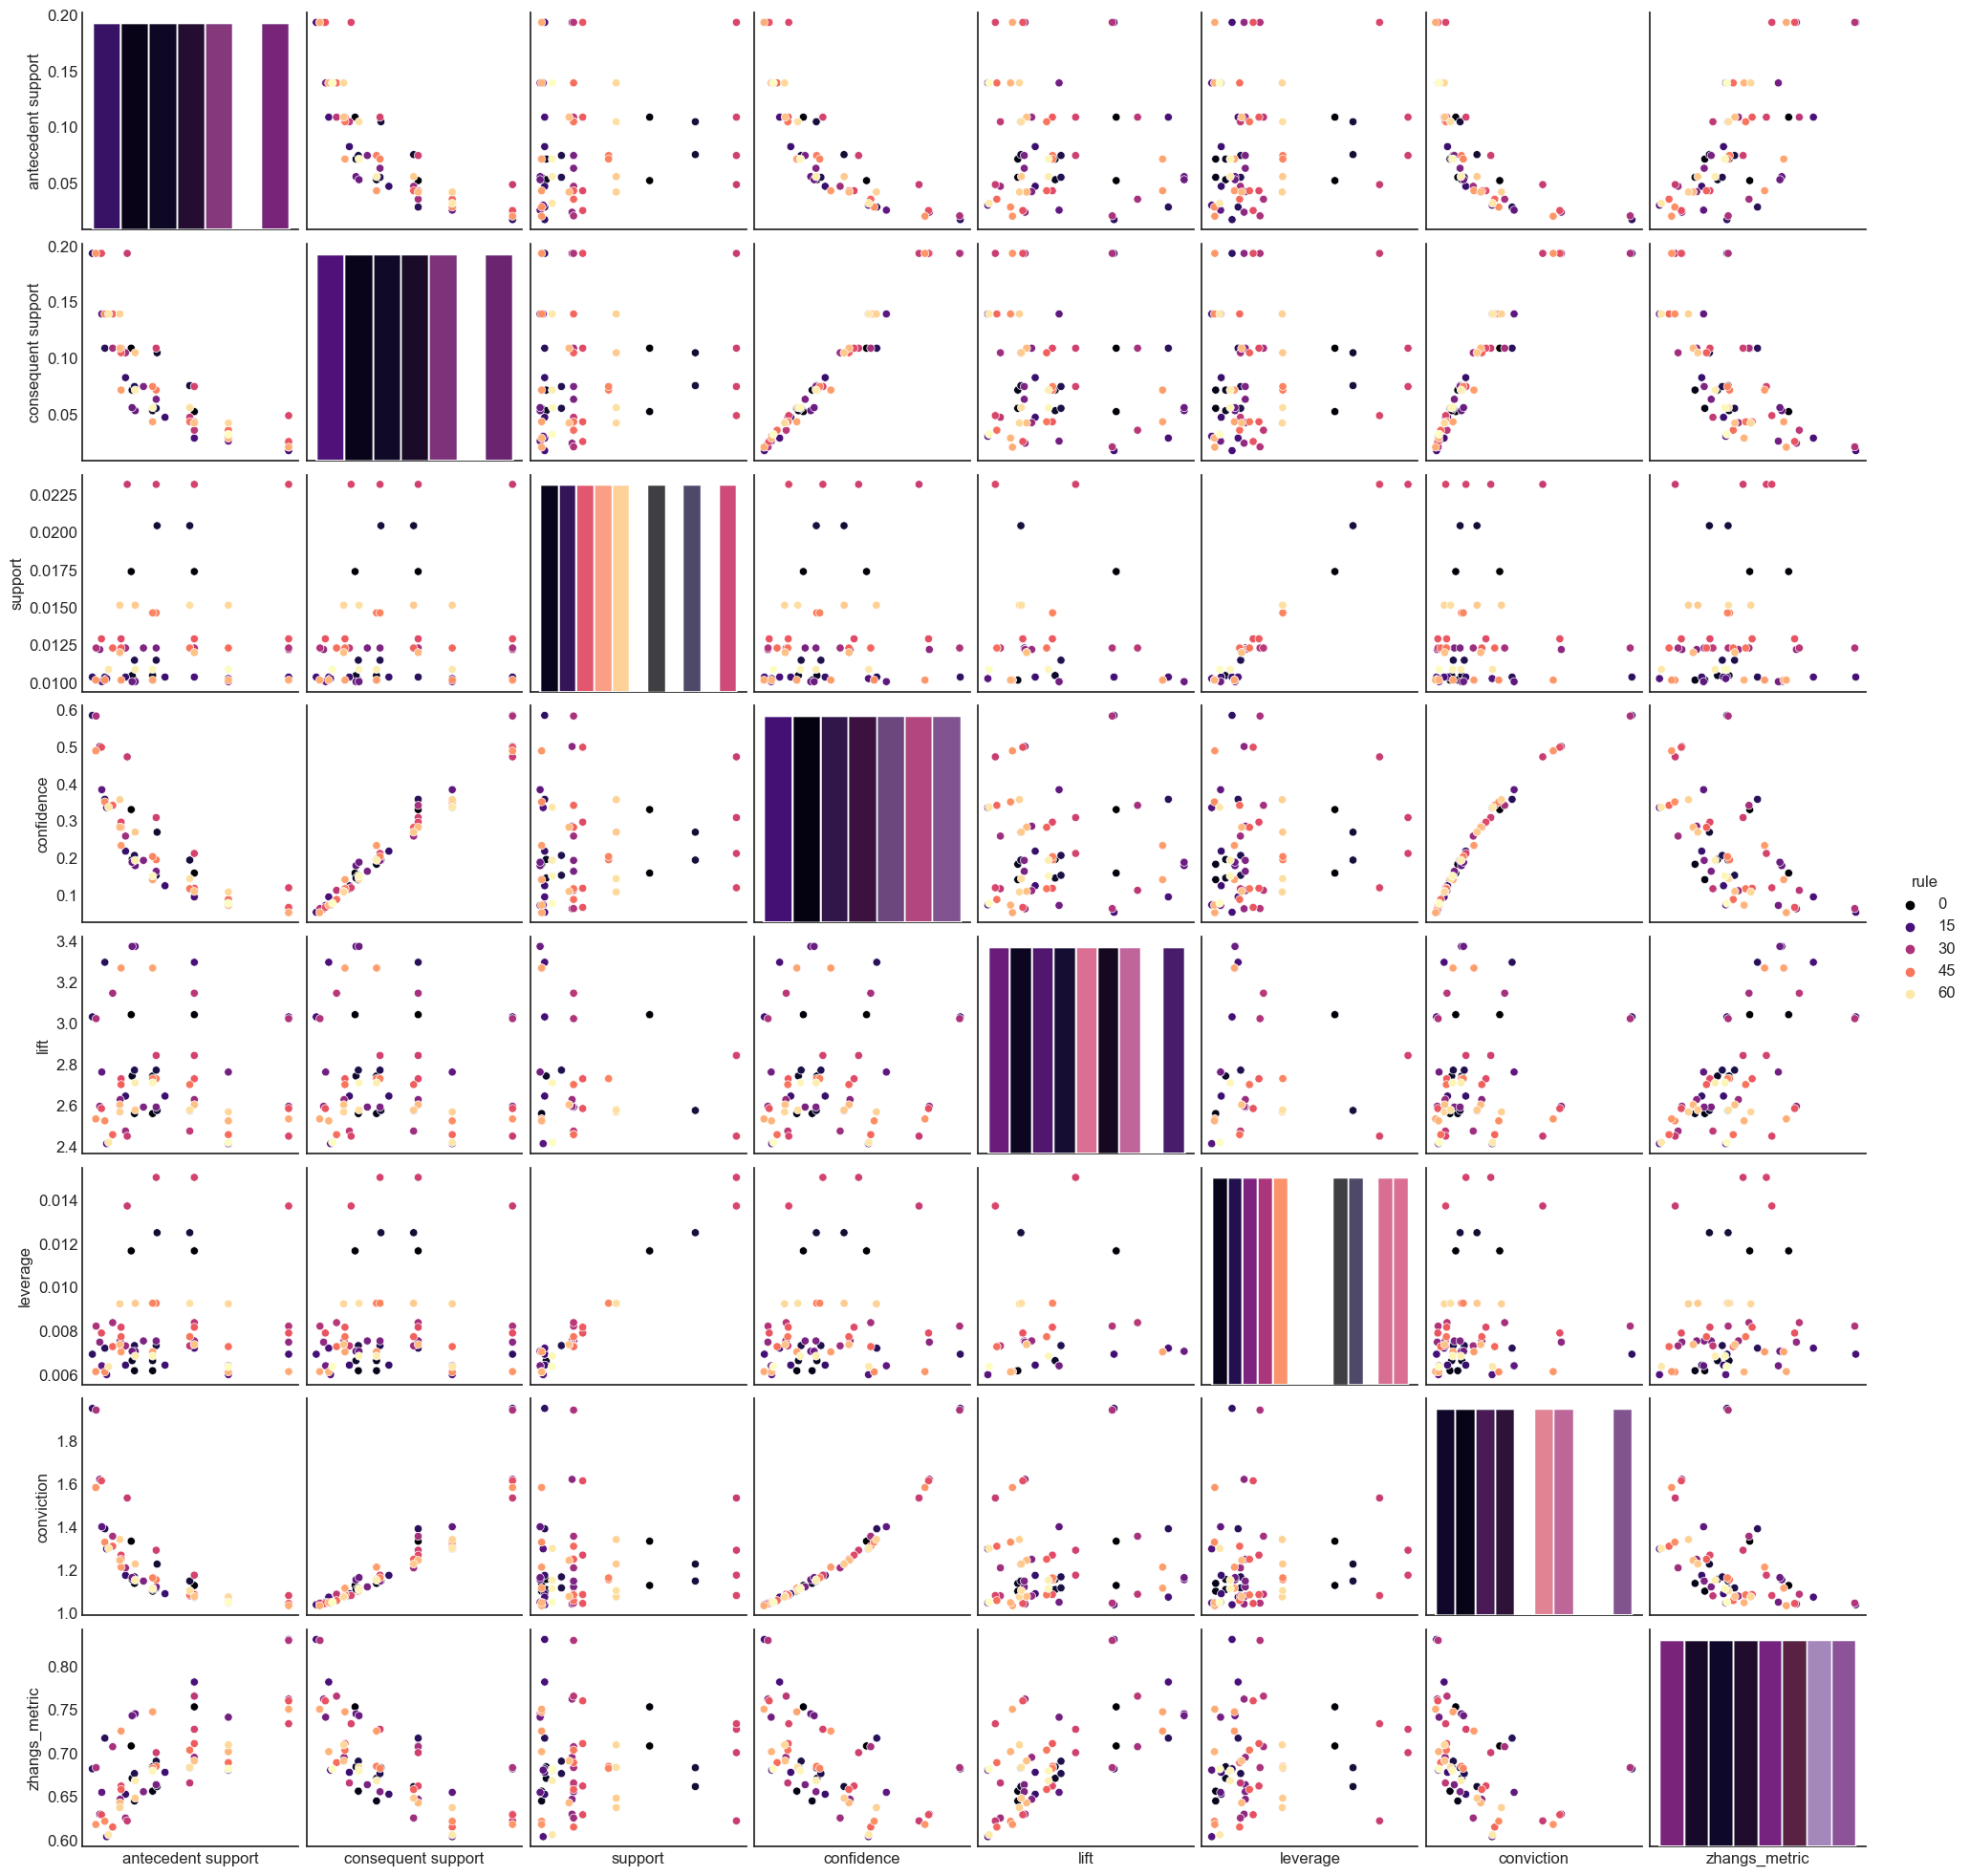

<Figure size 800x800 with 0 Axes>

In [95]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=8,8 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 3

plt.figure(figsize=(10,10))
sns.set_style('white')
plot_kws={"s": 1}
g = sns.pairplot(
             rules.drop(['antecedent_len','consequent_len'],axis=1),
             # kind='reg',
             diag_kind='hist',
             corner=False,
             # plot_kws=dict(scatter_kws=dict(s=5)),
             palette='magma',
             hue='rule'
            )


plt.show()
sns.despine()

In [96]:
rules.sort_values(['confidence']).head()

antecedents                        consequents  antecedent support  \
52  (other vegetables)       (whipped/sour cream, yogurt)            0.193493   
14  (other vegetables)    (citrus fruit, root vegetables)            0.193493   
26  (other vegetables)      (root vegetables, rolls/buns)            0.193493   
31  (other vegetables)  (root vegetables, tropical fruit)            0.193493   
40  (other vegetables)          (root vegetables, yogurt)            0.193493   

    consequent support   support  confidence      lift  leverage  conviction  \
52            0.020742  0.010168    0.052549  2.533410  0.006154    1.033570   
14            0.017692  0.010371    0.053600  3.029608  0.006948    1.037941   
26            0.024301  0.012201    0.063058  2.594890  0.007499    1.041366   
31            0.021047  0.012303    0.063584  3.020999  0.008231    1.045425   
40            0.025826  0.012913    0.066737  2.584078  0.007916    1.043836   

    zhangs_metric  antecedent_len  consequent_len  rule            antecedent  \
52       0.750489               1               2    52  ['other vegetables']   
14       0.830649               1               2    14  ['other vegetables']   
26       0.762085               1               2    26  ['other vegetables']   
31       0.829482               1               2    31  ['other vegetables']   
40       0.760086               1               2    40  ['other vegetables']   

                               consequent  
52       ['whipped/sour cream', 'yogurt']  
14    ['citrus fruit', 'root vegetables']  
26      ['root vegetables', 'rolls/buns']  
31  ['root vegetables', 'tropical fruit']  
40          ['root vegetables', 'yogurt']

In [97]:
G = nx.from_pandas_edgelist(rules,
                            source='antecedent',
                            target='consequent',
                            edge_attr='confidence'
                            # 
                           )

Once more, the network is generated randomly, making it challenging to provide insightful commentary. Nevertheless, it's evident that whole milk and other vegetables stand out as robust nodes (consequents) frequently associated with a wide range of purchased items.

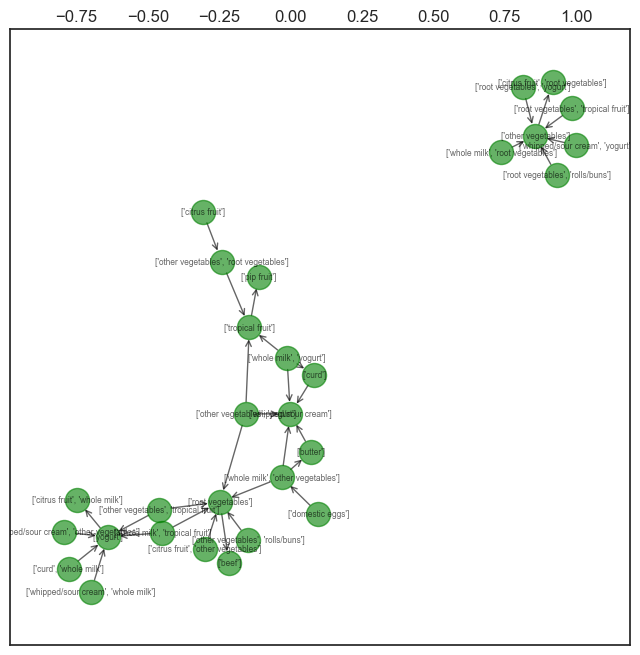

In [99]:
nx.draw_networkx(G,
                 arrows=True,
                 arrowstyle='<-',
                 with_labels=True,
                 cmap='magma',
                 alpha=0.6,
                 edge_color='black',
                 font_size=6,
                 node_color='green'
                 # 
                )

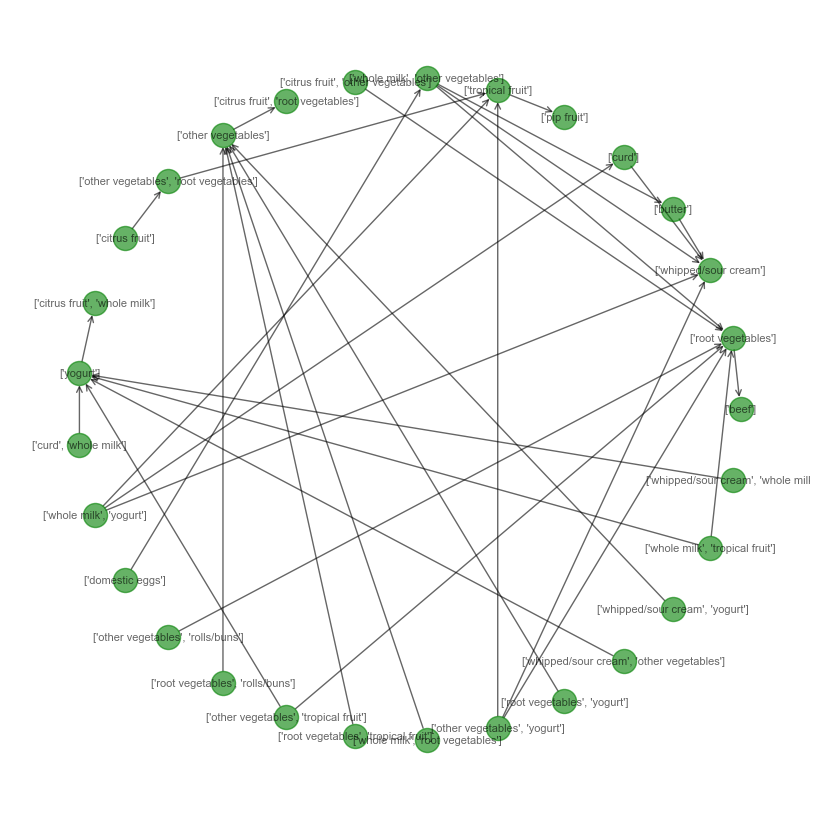

In [100]:
nx.draw_circular(G,
                 arrows=True,
                 arrowstyle='<-',
                 with_labels=True,
                 cmap='magma',
                 alpha=0.6,
                 edge_color='black',
                 font_size=8,
                 node_color='green'
                 # 
                )

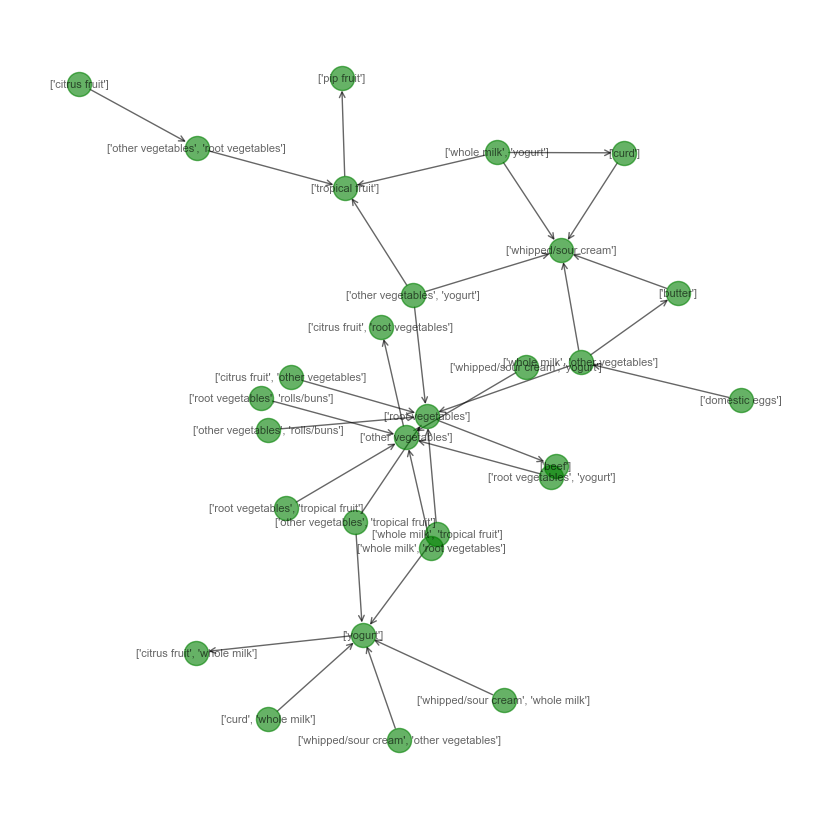

In [101]:
plt.rcParams['figure.figsize']=8,8
nx.draw_kamada_kawai(G,
                 arrows=True,
                 arrowstyle='<-',
                 with_labels=True,
                 cmap='magma',
                 alpha=0.6,
                 edge_color='black',
                 font_size=8,
                 node_color='green',
                )

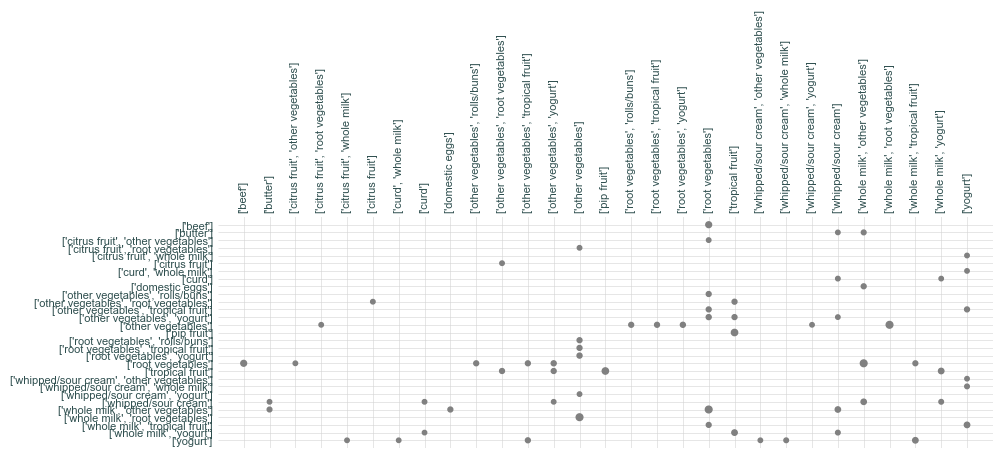

In [110]:
kcolors=['#F73972','#F2B3C6','#144962']
# create the plot
catscatter(rules,'antecedent','consequent','support',color=kcolors, ratio=1000)
rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: str(list(antecedent)))
rules['consequent'] = rules['consequents'].apply(lambda consequent: str(list(consequent)))
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

### Conclusion

Dairy products, like whole milk and yogurt, are strongly linked with vegetable and fruit items, similarly meat-related products also pair with dairy and vegetables. Soda, beers, wines, beverages, and liquor are commonly bought together. Notably, rolls/buns, soda, and yogurt frequently co-occur. 

In practical retail settings, placing these items at opposite ends of a store aims to promote increased browsing through the aisles, potentially leading to more purchases in between.

Leveraging confidence and lift metrics, businesses can strategically align advertising and coupons. Store layouts should encourage browsing through associated products. Implementing customer loyalty programs and tailored promotions based on purchasing behavior can enhance customer engagement. These insights can optimize marketing strategies and improve the in-store experience for the consumers.